# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры, влияющие на стоимость квартиры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [127]:
#импорт библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [128]:
# чтение файла с данными и сохранение в переменной df
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [129]:
pd.set_option('display.max_columns', None)

In [130]:
# просмотр общей информации по датафрейму
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [132]:
#явные дубликаты
df.duplicated().sum()

0

Явных дубликатов нет

In [133]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


План предобработки данных:

1. last_price 23699 non-null float64 - *Изменить тип*

2. first_day_exposition 23699 non-null object - *Изменить тип*

3. rooms 23699 non-null int64 - *Проанализировать, минимальное значение 0 комнат, подозрительно*

4. ceiling_height 14504 non-null float64 - *Больше половины пропусков, заполнить и проанализировать, min и max за гранью здравого смысла*

5. floors_total 23613 non-null float64 - *Мало пропусков, возможно, лучше удалить*

6. living_area 21796 non-null float64 - *Пропуски, нужен анализ*

7. is_apartment 2775 non-null object - *Изменить тип, заполнить пропуски(True, False)*
8. kitchen_area 21421 non-null float64 - *Пропуски, нужен анализ*

9. balcony 12180 non-null float64 - *Пропуски заполнить*

10. locality_name 23650 non-null object - *Мало пропусков, удалим, без локации бессмысленны для анализа*

11. airports_nearest 18157 non-null float64 - 
12. cityCenters_nearest 18180 non-n ull float64 - 
13. parks_around3000 18181 non-null float64 - 
14. parks_nearest 8079 non-null float64 - 
15. ponds_around3000 18181 non-null float64 - 
16. ponds_nearest 9110 non-null float64 - *пункты 11-16 Не буду заполнять пропуски во всех столбцах, которые связаны с локацией, без адресов и геоданных не заполнить*

17. days_exposition 20518 non-null float64 - *Оставить как есть*

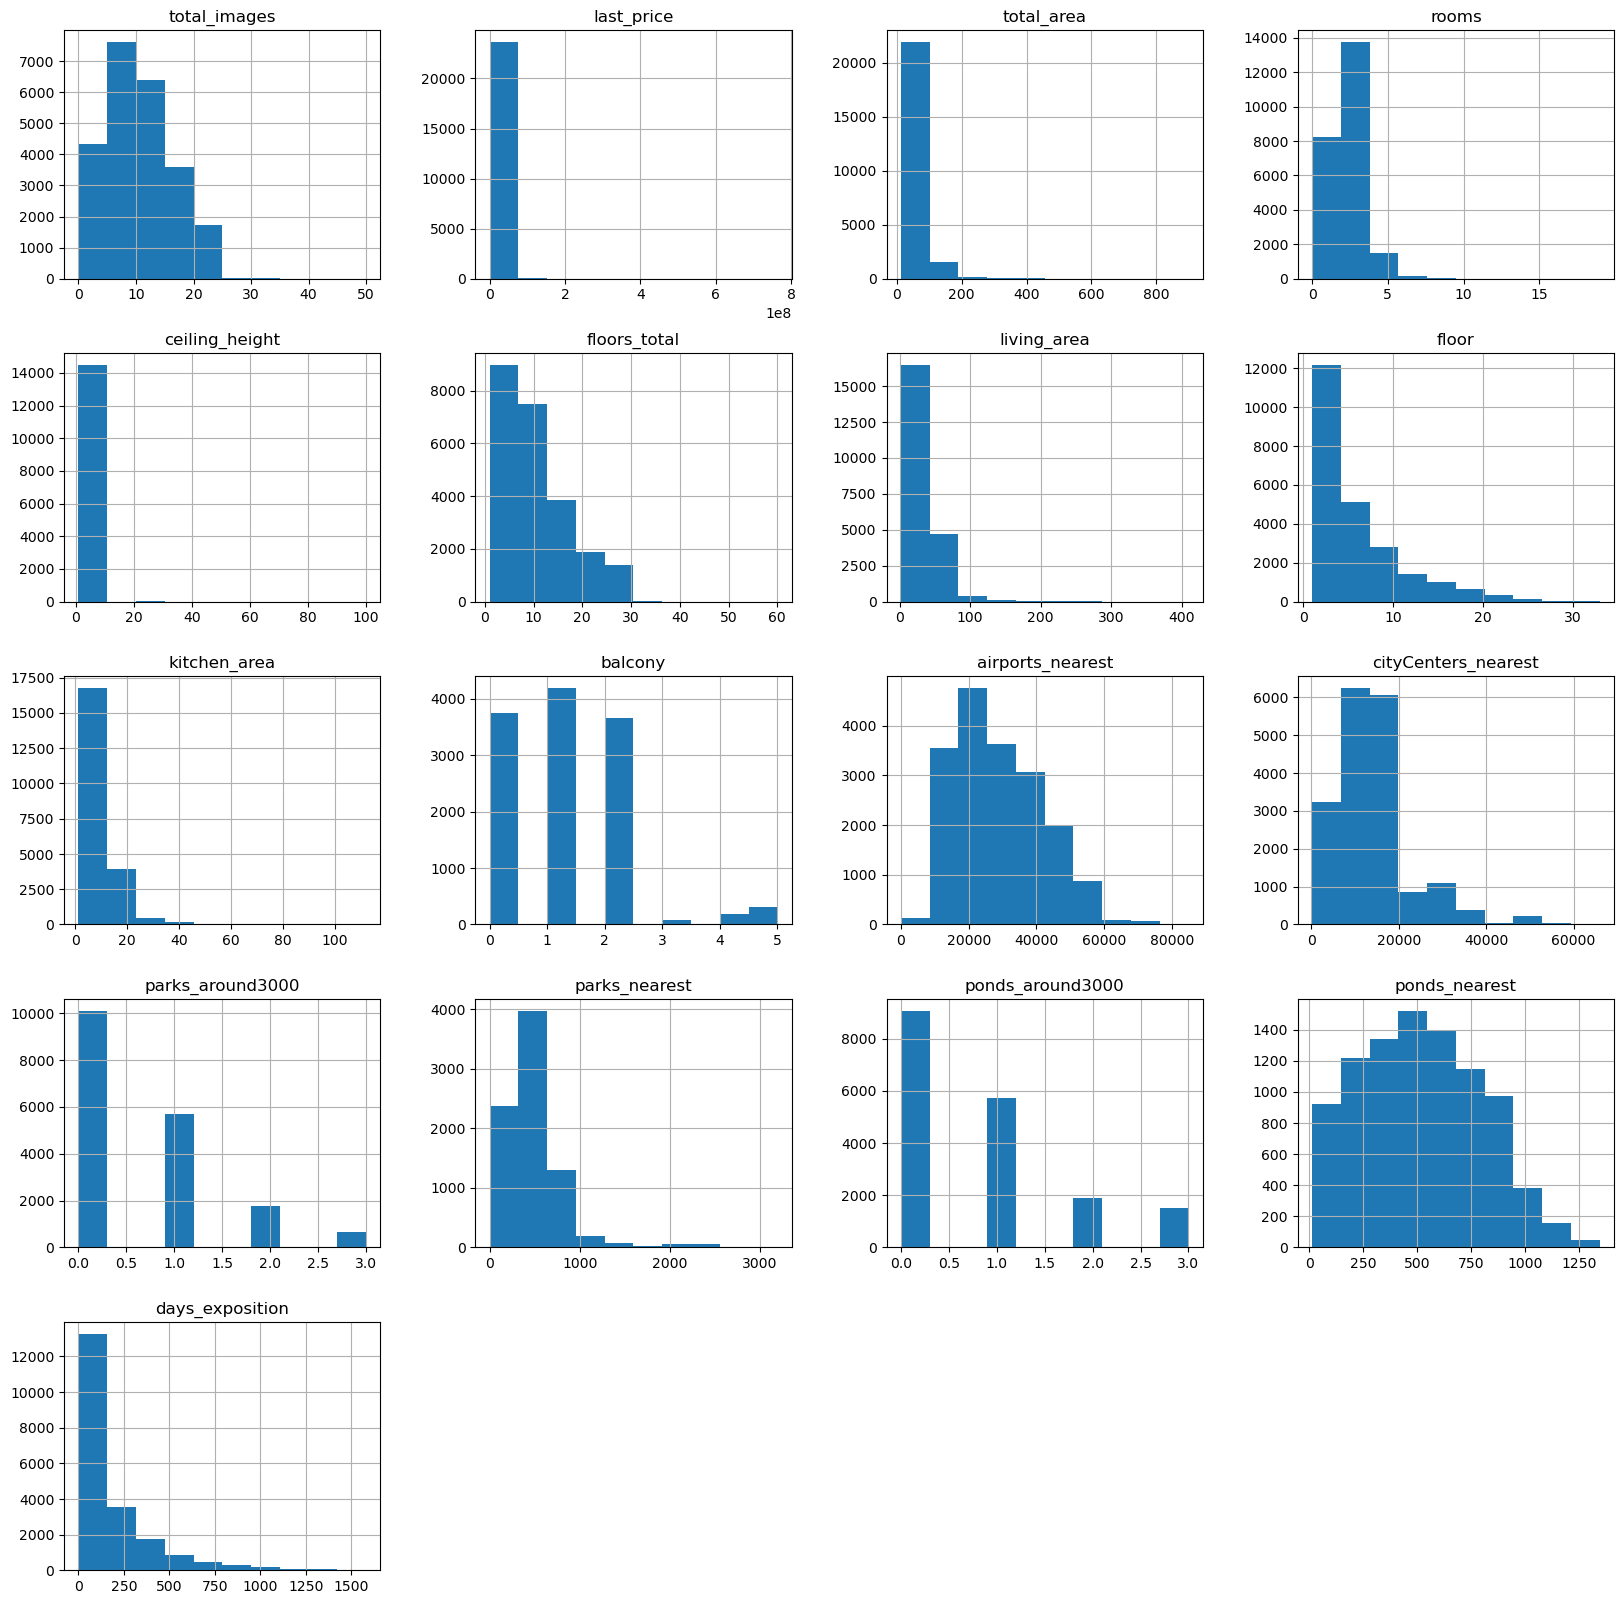

In [134]:
df.hist(figsize=(20, 20));

### Предобработка данных

#### Переименование столбцов

In [135]:
# переименование столбцов
df = df.rename(
    columns={'cityCenters_nearest':'city_centers_nearest', 
    'parks_around3000':'parks_around_3000',
    'ponds_around3000':'ponds_around_3000'})

#### Пропущенные значения, изменение типа данных, удаление дубликатов, выбросов

In [136]:
# просмотр количества пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Столбец last_price

Изменяем тип данных, делаем отображение цены в тысячах рублей, убераем выбросы

In [137]:
# изменение типа данных и перевод миллионов в тысячи рублей
df['last_price'] = (df['last_price']/1000000).astype(float)

In [138]:
# распределение цены
df['last_price'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
5%           1.870000
25%          3.400000
50%          4.650000
75%          6.800000
85%          8.800000
90%         10.914231
95%         15.300000
99%         36.000000
max        763.000000
Name: last_price, dtype: float64

Менее одного процента в датафрейме имеют цену квартиры больше 36 млн.рублей, для этого исследования убераем значения меньше 15 тысяч рублей и более 36 миллионов рублей

In [139]:
# количество значений больше 36 млн. рублей
df.query('last_price > 36')['last_price'].count()

236

In [140]:
# удаляем выбросы
df.drop(index=df.query(('last_price  > 36') or ('last_price < 0.015')).index, inplace=True, axis=0)
df.reset_index(inplace=True, drop=True)

##### Столбец first_day_exposition

In [141]:
# изменение типа данных
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# округление столбца до даты, время не пригодится
df['first_day_exposition'] = df['first_day_exposition'].dt.round('1d') 

In [142]:
# проверка вывода
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
4,10,2.890,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


##### Столбец rooms

Есть гипотеза, что квартиры с нулевым значением количества комнат или квартипы-студии, или квартиры со свободной поанировкой. Проверим:

In [143]:
print('Квартиры без комнат:',df.query('rooms == 0')['rooms'].count())

print('Квартиры-студии:',df.query('rooms == 0 and studio')['rooms'].count()) 

print('Квартиры-свободная планировка:',df.query('rooms == 0 and open_plan')['rooms'].count())

df.loc[df['studio'] == True, 'rooms'] = 0 

Квартиры без комнат: 196
Квартиры-студии: 138
Квартиры-свободная планировка: 58


Квартиры со значением 0 в столбце rooms это квартиры-студии + квартиры со свободной планировкой, исправлять в этом столбце ничего не нужно.

Посмотрим, как распределяются значения в столбце rooms:

In [144]:
df['rooms'].value_counts()

1     8033
2     7924
3     5746
4     1123
5      282
0      207
6       84
7       42
8        8
9        6
11       2
14       2
10       2
19       1
16       1
Name: rooms, dtype: int64

В СПб как в городе, полном доходных домов с многокомнатными квартирами, занимающими весь этаж, квартиры с 9-19 комнатами не являются аномалиями, но для данного исследования их лучше отбросить. Удалим квартиры с количеством комнат 9 и более.

In [145]:
df.drop(index=df.query('rooms > 9').index,inplace=True)

##### Столбец ceiling_height 

По СНИПам высота жилых помещений в многоквартирных домах не менее 2.3м, потолок высотой 6м тоже ок для старого фонда

In [146]:
# посмотрим, сколько таких квартир
df.query('ceiling_height < 2.3 or ceiling_height > 6')['ceiling_height'].count()


45

In [147]:
# посмотрим срез с уникальными аномальными значениями
df.query('ceiling_height < 2.3 or ceiling_height > 6')['ceiling_height'].unique()


array([ 25.  ,   2.  ,  32.  ,   8.  ,  27.  ,  24.  ,  26.  ,   1.2 ,
         8.3 ,   2.2 ,  14.  ,   1.75,  20.  ,   2.25,  22.6 ,  27.5 ,
        10.3 ,   1.  , 100.  ])

In [148]:
# посмотрю на срез квартир с такими потолками
df.query('ceiling_height < 2.3 or ceiling_height > 6')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
349,17,3.600,55.20,2018-07-12,2,25.00,5.0,32.000000,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
542,11,2.999,33.50,2017-03-30,1,2.00,15.0,17.500000,6,NaN,False,False,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2537,4,2.400,62.00,2018-12-27,3,2.00,5.0,40.000000,4,NaN,False,False,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3108,14,2.900,75.00,2018-11-12,3,32.00,3.0,53.000000,2,NaN,False,False,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3432,3,1.400,30.00,2018-03-16,1,8.00,5.0,15.300000,2,False,False,False,7.30,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4167,1,2.120,35.43,2017-12-18,1,2.00,18.0,16.600000,9,NaN,False,False,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
4595,0,4.300,45.00,2018-02-01,2,25.00,9.0,30.000000,2,NaN,False,False,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4827,7,3.000,25.00,2017-09-27,0,27.00,25.0,17.000000,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5025,0,3.850,30.50,2018-10-03,1,24.00,5.0,19.500000,1,True,False,False,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5194,0,2.500,54.00,2017-10-13,2,27.00,5.0,30.000000,3,NaN,False,False,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


Нет выдающихся по площади объектов, вполне обычные экземпляры.  
Предполагаем, что следующие значения ошибочны: все, что меньше 2.3 - ошибка, от 6 до 25, больше 32. 

24, 25, 26, 27, 32 - скорее всего ошибка ввода, пропущен десятичный разделитель, поэтому разделим на 10 и оставим в датафрейме, остальные объекты удалим.

In [149]:
df.drop(index=df.query('(ceiling_height < 2.3) or (ceiling_height > 6 and ceiling_height < 24) or (ceiling_height > 32)').index, inplace=True, axis=0)
df.reset_index(inplace=True, drop=True)

In [150]:
# деление на 10 для значений от 24 до 32
df.update(df[(df['ceiling_height'] >= 24) & (df['ceiling_height'] <= 32)]['ceiling_height']/10)

Заполню пропуски в этом столбце медианным значением 2.65

In [151]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)
print('Кол-во пропусков', df['ceiling_height'].isna().sum())

Кол-во пропусков 0


##### Столбцы total_area, living_area, kitchen_area

Посмотрю на распределение данных общей площади квартиры total_area:

In [152]:
df['total_area'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

count    23430.000000
mean        58.619933
std         29.151663
min         12.000000
5%          31.000000
25%         40.000000
50%         51.800000
75%         68.900000
85%         80.000000
90%         91.000000
95%        110.000000
99%        169.855000
max        470.300000
Name: total_area, dtype: float64

In [153]:
# количество значений больше 200 кв.метров
df.query('total_area > 200')['total_area'].count()

111

Можно удалить такие значения, так как они составляют меньше 1% датасета. Это не аномалии, такие квартиры бывают, но в этом исследовании такие квартиры рассматривать не будем.

In [154]:
df.drop(index=df.query('total_area > 200').index,inplace=True)

Заполню пропуски в столбцах living_area и kitchen_area

1. Отсутствующие значения living_area для строк, где заполнены значения kitchen_area, получу как разность total_area и kitchen_area. 
2. Отсутствующие значения kitchen_area для строк, где заполнены значения living_area, получу как разность total_area и kitchen_area. 

Понятно, что это не совсем корректно с точки зрения распределения площадей, ведь есть ещё доля нежилой площади, зато с точки зрения получения значений на основе уже имеющихся данных кажется в данном случае более оптимальным вариантом.

Для студий значение площади кухни должно быть по логике равно нулю, но по нормам такого быть не может, может быть кухня-ниша, заполню пропуски значением 2 кв.м. 
В строках, где не заполнены значения и в living_area, и в kitchen_area, заполню по медианной долей площади по квартирам с одинаковым количеством комнат.
    

In [155]:
# есть ли студии, где общая площадь равна жилой
df.query('studio == True and living_area == total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [156]:
# в студиях площадь кухни равна 2
df.loc[df['studio'] == True, 'kitchen_area'] = 2
# остались ли пропуски в kitchen_area
print(df.loc[(df['kitchen_area'].isna() == True) & (df['studio'] == True),'total_area'].count())

0


In [157]:
# количество строк, где значения living_area не заполнены,  kitchen_area - заполнены
print(df.loc[(df['living_area'].isna() == True) & (df['kitchen_area'].isna() == False),'total_area'].count())
# количество строк, где значения kitchen_area не заполнены,  living_area - заполнены
print(df.loc[(df['living_area'].isna() == False) & (df['kitchen_area'].isna() == True),'total_area'].count())
# количество строк, где значения kitchen_area не заполнены и living_area - не заполнены
print(df.loc[(df['living_area'].isna() == True) & (df['kitchen_area'].isna() == True),'total_area'].count())

437
662
1423


In [158]:
# заполнение пропусков living_area разностью total_area и kitchen_area 
df.loc[(df['living_area'].isna() == True) & (df['kitchen_area'].isna() == False), 'living_area'] \
= df.total_area - df.kitchen_area

In [159]:
# заполнение пропусков kitchen_area разностью total_area и living_area 
df.loc[(df['living_area'].isna() == False) & (df['kitchen_area'].isna() == True), 'kitchen_area'] \
= df.total_area - df.living_area

In [160]:
#заполнение оставшихся пропусков по медианной долей площади по квартирам с одинаковым количеством комнат
for r in range(1, 20):
    coefficient = (df[df['rooms'] == r]['living_area'] / df[df['rooms'] == r]['total_area']).median()
    df['living_area'] = df['living_area'].fillna(value = df['total_area'] * coefficient)

In [36]:
#заполнение оставшихся пропусков по медианной долей площади по квартирам с одинаковым количеством комнат
for r in range(1, 20):
    ratio = (df[df['rooms'] == r]['kitchen_area'] / df[df['rooms'] == r]['total_area']).median()
    df['kitchen_area'] = df['kitchen_area'].fillna(value = df['total_area'] * ratio)

Теперь нужно проверить, что в результате манипуляций не появились объекты, где общая площадь меньше суммы жилой площади и площади кухни:

In [37]:
#проверка, есть ли квартиры, где площадь жилая и кухни больше общей
df[(df['living_area'] + df['kitchen_area']) > df['total_area']]['rooms'].count()

68

Такие объекты есть, выполним корректировку:

In [38]:
#корректировка площади кухни
df.loc[((df.total_area - df.kitchen_area - df.living_area) <= 0), 'kitchen_area'] = (df.total_area - df.living_area)

In [39]:
#проверка после корректировки, что суммарная площадь жилая и кухни не больше общей
df[(df['living_area'] + df['kitchen_area']) > df['total_area']]['rooms'].count()

0

In [40]:
#проверка, что пропуски заполнены
print(df['living_area'].isna().sum())
print(df['kitchen_area'].isna().sum())

0
0


##### Столбцы is_apartment, balcony

Полагаю, что все пропуски is_apartment, balcony означают, что квартира не является апарраментами, а балконов нет. Заполним пропуски:

In [41]:
# Количество пропусков в аппартаментах. Всего аппартаменты - 50. Заменяем пропущенные значения на FALSE
df['is_apartment'] = df['is_apartment'].fillna(value=False)
# Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
df['balcony'] = df['balcony'].fillna(value=0).astype(int)

In [42]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5517
city_centers_nearest     5497
parks_around_3000        5496
parks_nearest           15491
ponds_around_3000        5496
ponds_nearest           14478
days_exposition          3092
dtype: int64

##### Столбцы locality_name и floors_total

Строки с пропусками в столбцах floors_total и locality_name удалю, п.ч. с одной стороны заполнить пропуски более менее достоверно не удастся, с другой стороны удаляемые строки составляют меньше процента от датафрейма, искажения данных не ожидаем.

In [43]:
# удаление строк датафрейма с пропусками 
df.dropna(subset=['floors_total','locality_name'], inplace=True)

In [44]:
# проверка, что удаление прошло корректно
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5499
city_centers_nearest     5479
parks_around_3000        5478
parks_nearest           15407
ponds_around_3000        5478
ponds_nearest           14419
days_exposition          3082
dtype: int64

Удаление неявных дубликатов в столбце locality_name

In [45]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Проведем замены буквы ё на е, и 'городского поселка' на 'поселок городского типа':

In [46]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок городского типа')

In [47]:
print(df.shape[0])

23186


In [48]:
ratio_new_old_df = round(((1 - 23186 / 23699) * 100), 1)
print(ratio_new_old_df)

2.2


Из датафрейма удалено 513 строк, что составляет 2,2% от исходных данных.

### Посчитаем и добавим в таблицу новые столбцы:
- цена за квадратный метр
- день недели
- месяц
- год
- категория этажа
- расстояние до центра города в километрах

In [49]:
#добавление столбцов с ценой за квадратный метр
df['sqm_price'] = (df['last_price']*1000 / df['total_area']).astype(int)
print(df['sqm_price'])

0        120
1         82
2         92
3        100
4         95
        ... 
23425     72
23426     52
23427     44
23428    149
23429     41
Name: sqm_price, Length: 23186, dtype: int32


In [50]:
#добаление столбцов с днем недели, месяцем и годом
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [51]:
#категоризация по этажу
df['floor_type'] = ['другой']*len(df['floor'])
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний'

In [52]:
#расстояние до центра города в километрах
df['city_center_km'] = round(df['city_centers_nearest'] / 1000, 0)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23186 entries, 0 to 23429
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23186 non-null  int64         
 1   last_price            23186 non-null  float64       
 2   total_area            23186 non-null  float64       
 3   first_day_exposition  23186 non-null  datetime64[ns]
 4   rooms                 23186 non-null  int64         
 5   ceiling_height        23186 non-null  float64       
 6   floors_total          23186 non-null  float64       
 7   living_area           23186 non-null  float64       
 8   floor                 23186 non-null  int64         
 9   is_apartment          23186 non-null  bool          
 10  studio                23186 non-null  bool          
 11  open_plan             23186 non-null  bool          
 12  kitchen_area          23186 non-null  float64       
 13  balcony         

### Исследовательский анализ данных

#### Анализ данных по столбцам

Для просмотра информации напишем функцию, чтобы каждый раз не дублировать код

In [54]:
#для просмотра информации напишу две функции, чтобы каждый раз не дублировать код
def column_info(column):
    print(df[column].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]))
    print(f'Количество пропусков: {df[column].isna().sum()}')
    sns.boxplot(x=df[column])
    plt.show()
def info_hist(column):
    plt.hist(x=df[column], bins=50, edgecolor='black')
    plt.grid()
    plt.show()

##### Цена объекта last_price

count    23186.000000
mean         5.742952
std          4.134894
min          0.012190
5%           1.850000
25%          3.400000
50%          4.600000
75%          6.600000
85%          8.485589
90%         10.150000
95%         13.548744
99%         23.900000
max         36.000000
Name: last_price, dtype: float64
Количество пропусков: 0


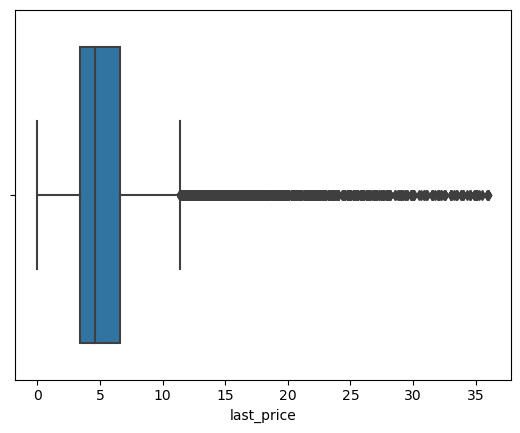

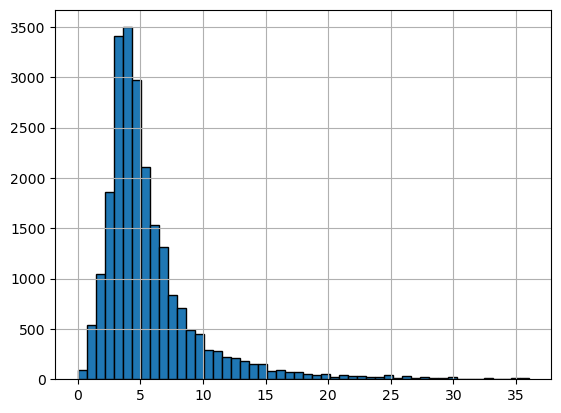

In [55]:
column_info('last_price')
info_hist('last_price')

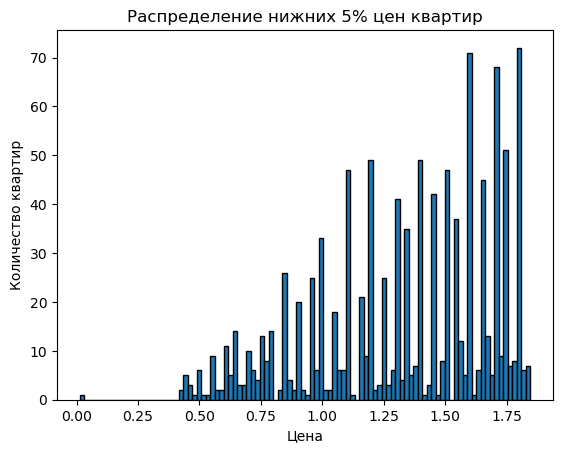

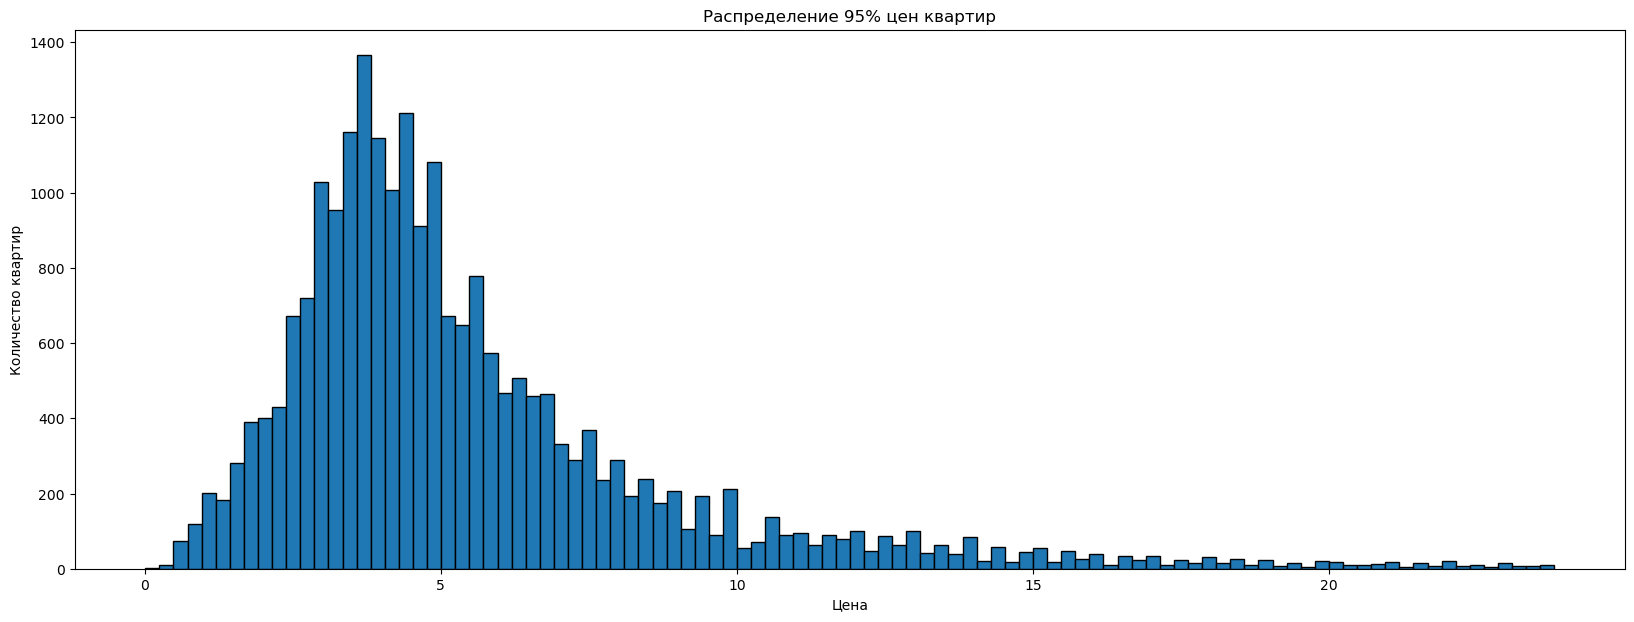

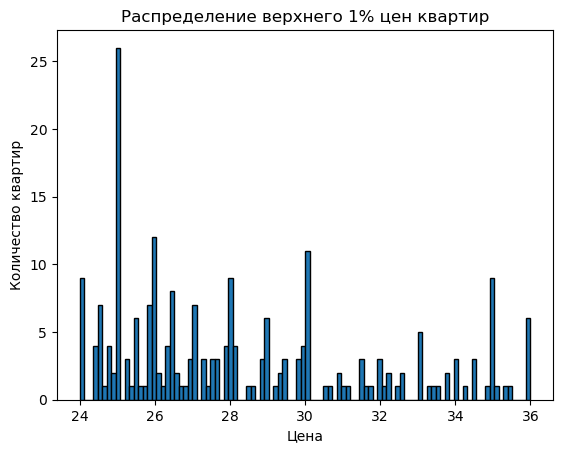

In [56]:
# гистограмма по нижним 5% 
plt.hist(df[df['last_price'] < np.quantile(df['last_price'], 0.05)]['last_price'], bins=100, edgecolor='black')
#df.hist('last_price', bins=80, figsize=(15, 5), range=(0, 1900000))
plt.title('Распределение нижних 5% цен квартир')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
# гистограмма по 95% данных
plt.figure(figsize=(20, 7));
plt.hist(df[df['last_price'] < np.quantile(df['last_price'], 0.99)]['last_price'], bins=100, edgecolor='black')
plt.title('Распределение 95% цен квартир')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
# гистограмма по верхнему 1%
plt.hist(df[df['last_price'] > np.quantile(df['last_price'], 0.99)]['last_price'], bins=100, edgecolor='black')
plt.title('Распределение верхнего 1% цен квартир')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

In [57]:
# количество квартир выше 13,5 млн.рублей
df[df['last_price'] > np.quantile(df['last_price'], 0.95)]['last_price'].count()

1160

In [58]:

df[(df['last_price'] > np.quantile(df['last_price'], 0.95)) & (df['locality_name'] == 'Санкт-Петербург')]['last_price'].count()

1121

In [59]:
df[(df['last_price'] > np.quantile(df['last_price'], 0.95)) & (df['locality_name'] != 'Санкт-Петербург')][['locality_name', 'total_area']].value_counts()

locality_name            total_area
Пушкин                   135.00        2
Сестрорецк               100.00        2
Всеволожск               38.12         1
Сестрорецк               92.20         1
Пушкин                   151.00        1
                         157.30        1
                         159.00        1
                         170.00        1
                         190.00        1
Сестрорецк               93.00         1
Пушкин                   125.60        1
Сестрорецк               121.00        1
                         123.00        1
                         123.20        1
деревня Бор              192.30        1
деревня Новое Девяткино  170.00        1
поселок Александровская  178.00        1
Пушкин                   134.70        1
                         121.30        1
Выборг                   186.00        1
Пушкин                   115.00        1
Гатчина                  95.00         1
Зеленогорск              71.00         1
                     

Большая часть квартир с ценой больше 13,5 млн. рублей расположена в СПб и в популярных пригородах.

In [60]:
# распределение цен по Ленобласти
df[df['city_center_km'] > 40]['last_price'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

count    292.000000
mean       4.228067
std        2.657295
min        1.650000
5%         2.250000
25%        2.900000
50%        3.650000
75%        4.610000
85%        5.493500
90%        6.100000
95%        7.984500
99%       17.250075
max       28.000000
Name: last_price, dtype: float64

Text(0, 0.5, 'Количество квартир')

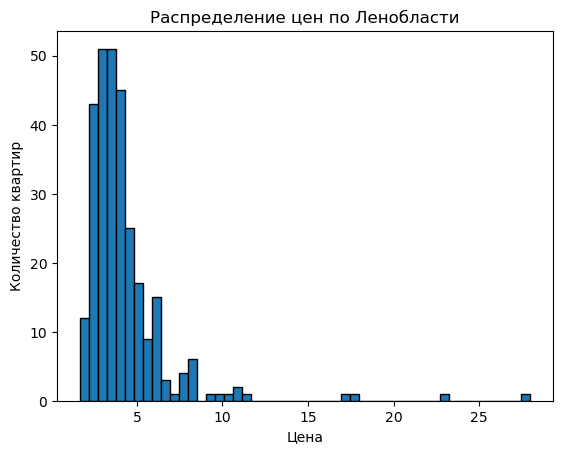

In [61]:
# гистограмма распределения цен по Ленобласти
plt.hist(df[(df['city_center_km'] > 40)]['last_price'], bins=50, edgecolor='black');
plt.title('Распределение цен по Ленобласти')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

In [62]:
# распределение цен по СПб
df[df['city_center_km'] < 40]['last_price'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

count    17399.000000
mean         6.613050
std          4.312583
min          0.012190
5%           3.000000
25%          4.000000
50%          5.210000
75%          7.500000
85%          9.500000
90%         11.509760
95%         15.000000
99%         25.000000
max         36.000000
Name: last_price, dtype: float64

Text(0, 0.5, 'Количество квартир')

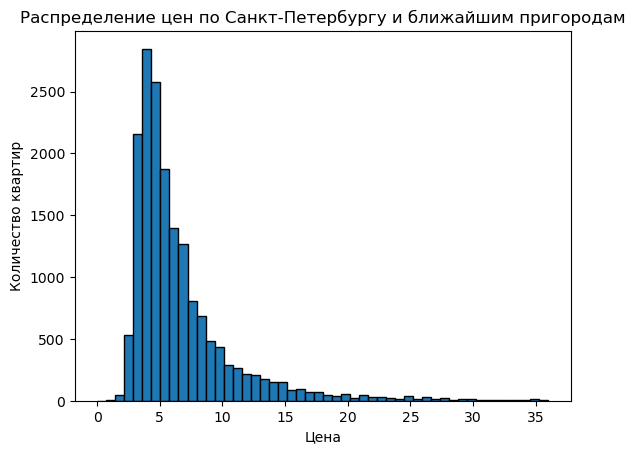

In [63]:
# распределение цен по СПб
plt.hist(df[df['city_center_km'] < 40]['last_price'], bins=50, edgecolor='black');
plt.title('Распределение цен по Санкт-Петербургу и ближайшим пригородам')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

**По всем объектам**

Большее количество объектов имеют цену менее 36 млн.рублей. 
95% объектов стоят меньше 13,5 млн.рублей. 1160 объектов стоят больше (13,5-36,0 млн. рублей).
Среднее и медианное значения цены отличаются на 1 млн. Средняя цена - 5,74 млн, медианная - 4,6 млн. 
Смещение обусловено значениями цены по 5% относительно дорогостоящих объектов.

Граница СПб и Ленобласть были определены как 40 от цента СПб, так как ближайшие пригороды тоже стоит отнести к СПб.

**Ленобласть**

75% объектов имеют цену менее 4,6 млн.рублей. 
Средняя цена - 4,22 млн, медианная - 3,65 млн. 

**СПб**

75% объектов имеют цену менее 7,5 млн.рублей. 
Средняя цена - 6,61 млн, медианная - 5,21 млн. 

##### Общая площадь total_area

count    23186.000000
mean        57.662290
std         25.630147
min         12.000000
5%          31.000000
25%         40.000000
50%         51.400000
75%         68.100000
85%         80.000000
90%         90.000000
95%        107.600000
99%        154.015000
max        200.000000
Name: total_area, dtype: float64
Количество пропусков: 0


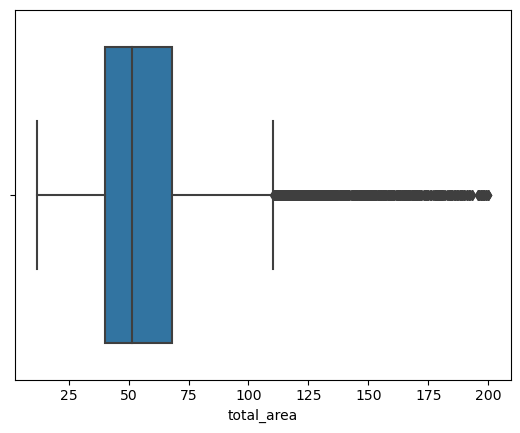

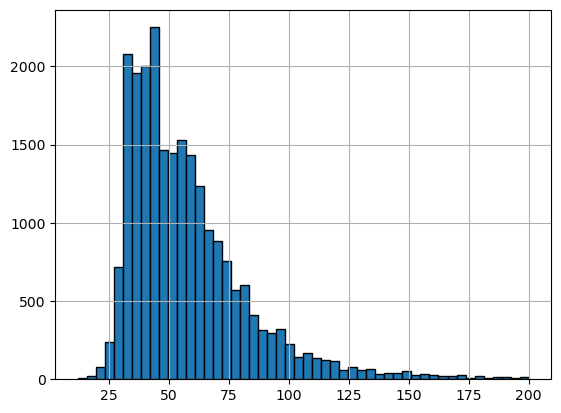

In [64]:
column_info('total_area')
info_hist('total_area')

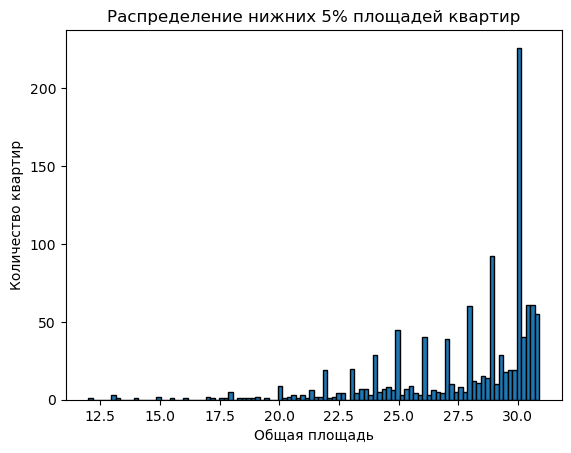

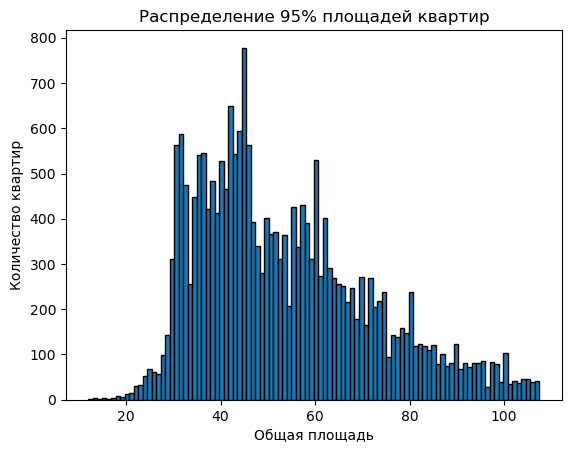

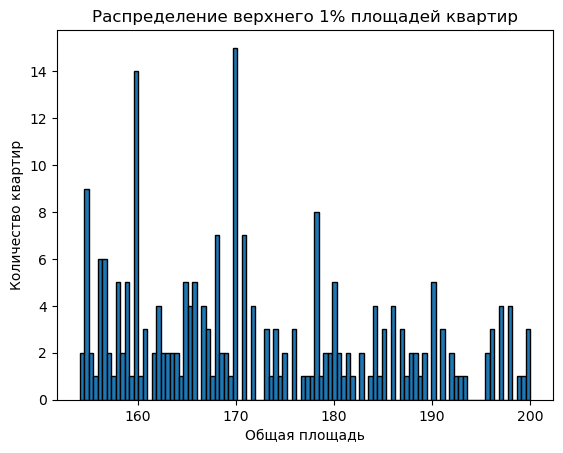

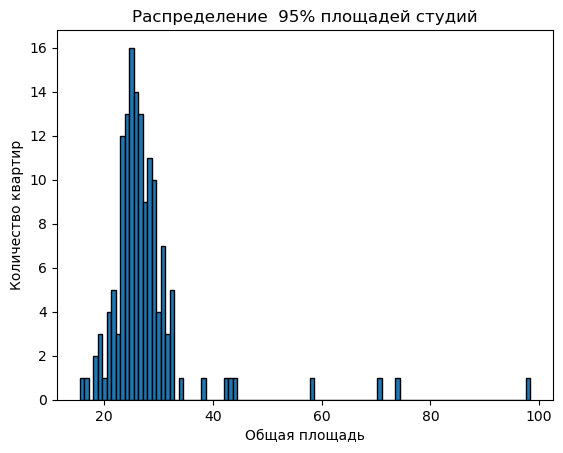

In [65]:
# гистограмма по нижним 5% 
plt.hist(df[df['total_area'] < np.quantile(df['total_area'], 0.05)]['total_area'], bins=100, edgecolor='black')
plt.title('Распределение нижних 5% площадей квартир')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()
# гистограмма по 95% данных
plt.hist(df[df['total_area'] < np.quantile(df['total_area'], 0.95)]['total_area'], bins=100, edgecolor='black')
plt.title('Распределение 95% площадей квартир')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()
# гистограмма по верхним 5%
plt.hist(df[df['total_area'] > np.quantile(df['total_area'], 0.99)]['total_area'], bins=100, edgecolor='black')
plt.title('Распределение верхнего 1% площадей квартир')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()
# гистограмма по студиям
plt.hist(df[(df['total_area'] < np.quantile(df['total_area'], 0.95)) & (df['studio'] == True)]['total_area'], bins=100, edgecolor='black')
plt.title('Распределение  95% площадей студий')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

In [66]:
df[(df['total_area'] < np.quantile(df['total_area'], 0.95)) & (df['studio'] == True)]['total_area'].describe()

count    146.000000
mean      27.808151
std        9.396492
min       15.500000
25%       24.000000
50%       26.025000
75%       28.975000
max       98.400000
Name: total_area, dtype: float64

Средняя площадь студии 26 кв.м., а выбросы больше 60 кв. метров возможно и не студии, а квартиры со свободной планировкой.

count    7975.000000
mean       37.543684
std         7.281335
min        12.000000
25%        32.500000
50%        36.600000
75%        41.000000
max       106.900000
Name: total_area, dtype: float64


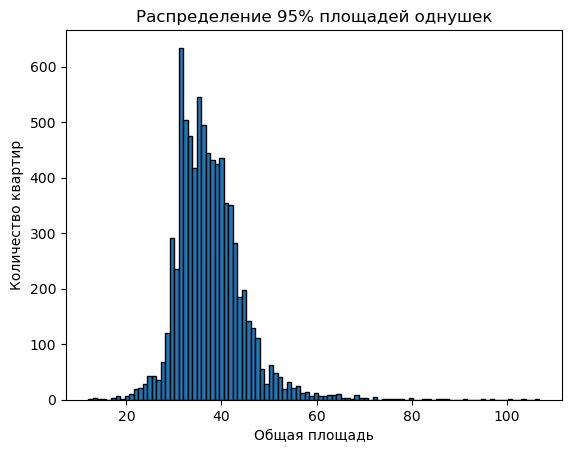

In [67]:
#просмотр статистик по распределению площадей однушек
print(df[(df['total_area'] < np.quantile(df['total_area'], 0.95)) & (df['rooms'] == 1)]['total_area'].describe())
# гистограмма по однушкам
plt.hist(df[(df['total_area'] < np.quantile(df['total_area'], 0.95)) & (df['rooms'] == 1)]['total_area'], bins=100, edgecolor='black')
plt.title('Распределение 95% площадей однушек')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

count    7822.000000
mean       55.267758
std        11.650848
min        20.000000
25%        46.000000
50%        53.000000
75%        61.500000
max       107.000000
Name: total_area, dtype: float64


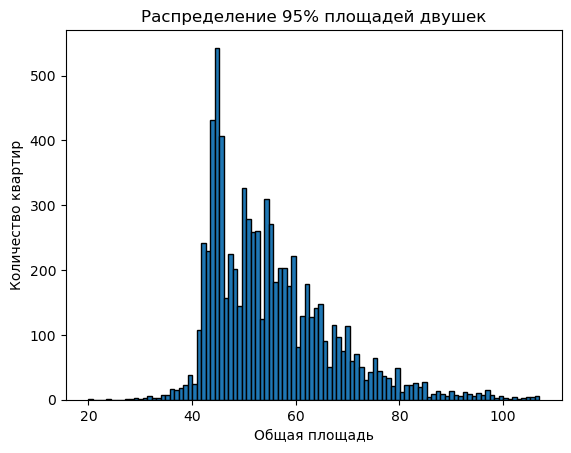

In [68]:
#просмотр статистик по распределению площадей двушек
print(df[(df['total_area'] < np.quantile(df['total_area'], 0.95)) & (df['rooms'] == 2)]['total_area'].describe())
# гистограмма по однушкам
plt.hist(df[(df['total_area'] < np.quantile(df['total_area'], 0.95)) & (df['rooms'] == 2)]['total_area'], bins=100, edgecolor='black')
plt.title('Распределение 95% площадей двушек')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

count    5277.000000
mean       72.561340
std        14.127358
min        40.100000
25%        61.000000
50%        71.000000
75%        82.000000
max       107.500000
Name: total_area, dtype: float64


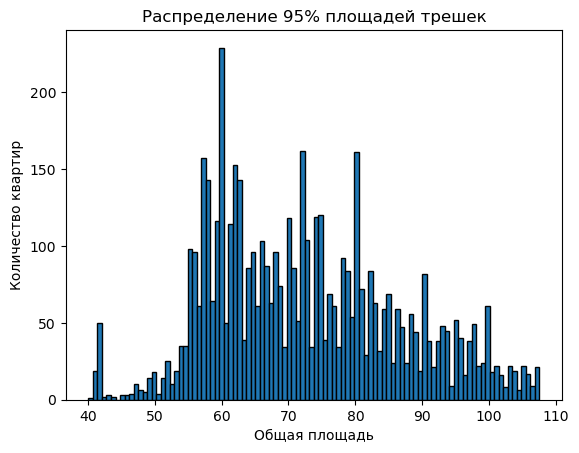

In [69]:
#просмотр статистик по распределению площадей трешек
print(df[(df['total_area'] < np.quantile(df['total_area'], 0.95)) & (df['rooms'] == 3)]['total_area'].describe())
# гистограмма по однушкам
plt.hist(df[(df['total_area'] < np.quantile(df['total_area'], 0.95)) & (df['rooms'] == 3)]['total_area'], bins=100, edgecolor='black')
plt.title('Распределение 95% площадей трешек')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

Средняя площадь квартиры 57,7 кв. метра, медианная 51,4.  

95% квартир имеют площадь до 107 кв. метров,  
Квартиры с площадью от 107 до 200 составляют менее 5% процентов объектов. 
Площадь более 100 метров для Санкт-Петербурга нормальное явление в виду коммунальных квартир в старом фонде. Минимальная площадь 12 кв. метров тоже нормальное значение: достаточно много объявлений о продаже комнат как студии или даже однокомнатной квартиры.

##### Жилая площадь living_area

count    23186.000000
mean        33.029144
std         17.224152
min          2.000000
5%          15.100000
25%         18.700000
50%         30.000000
75%         42.000000
85%         48.000000
90%         53.400000
95%         64.600000
99%         95.426094
max        186.120000
Name: living_area, dtype: float64
Количество пропусков: 0


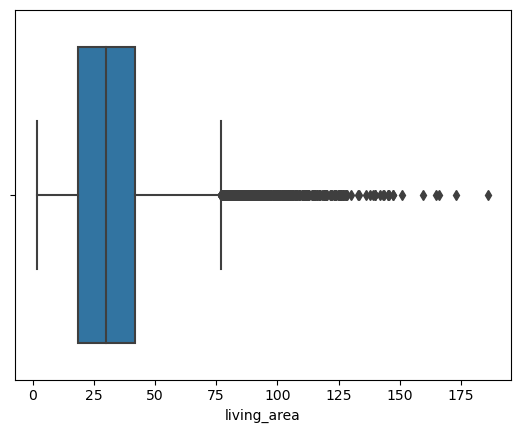

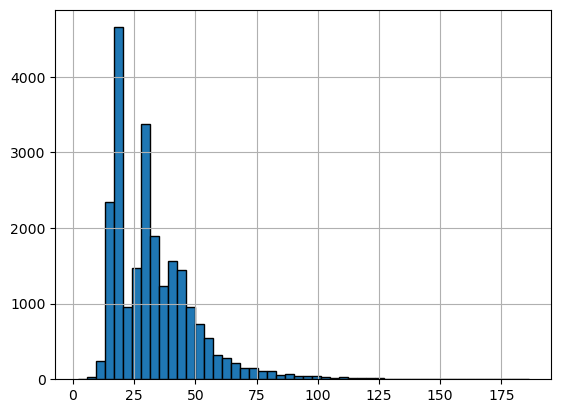

In [70]:
column_info('living_area')
info_hist('living_area')

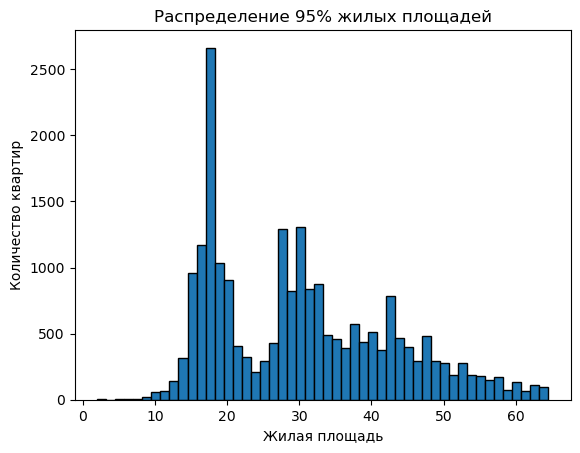

In [71]:
# гистограмма по распределению 95% данных жилой площади
plt.hist(df[df['living_area'] < np.quantile(df['living_area'], 0.95)]['living_area'], bins=50, edgecolor='black')
plt.title('Распределение 95% жилых площадей')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

Интересно, что на гистограммме имеется два пика. Могу предположить, что это связано с нормативами и серийным домами, а так же, что первый пик - это однокомнатные квартиры, второй -двухкомнатные.

In [72]:
#статистики для жилых площадей 1-к квартир
df[(df['living_area'] < np.quantile(df['living_area'], 0.95)) & (df['rooms'] == 1)]['living_area'].describe()

count    7977.000000
mean       18.130732
std         3.933223
min         3.000000
25%        16.000000
50%        17.700000
75%        19.000000
max        60.000000
Name: living_area, dtype: float64

In [73]:
#статистики для жилых площадей 2-к квартир
df[(df['living_area'] < np.quantile(df['living_area'], 0.95)) & (df['rooms'] == 2)]['living_area'].describe()

count    7837.000000
mean       31.547467
std         6.177235
min         2.000000
25%        28.000000
50%        30.300000
75%        34.000000
max        64.120000
Name: living_area, dtype: float64

Похоже, что предположение верно. Средняя жилая площадь 1-к квартиры 18.6 кв.м., 2-к - 32 кв.м., что и видно на общей гистограмме. 

##### Площадь кухни kitchen_area

count    23186.000000
mean        10.705472
std          5.795134
min          0.000000
5%           5.500000
25%          7.100000
50%          9.400000
75%         12.000000
85%         14.500000
90%         16.400000
95%         21.000000
99%         35.000000
max        117.900000
Name: kitchen_area, dtype: float64
Количество пропусков: 0


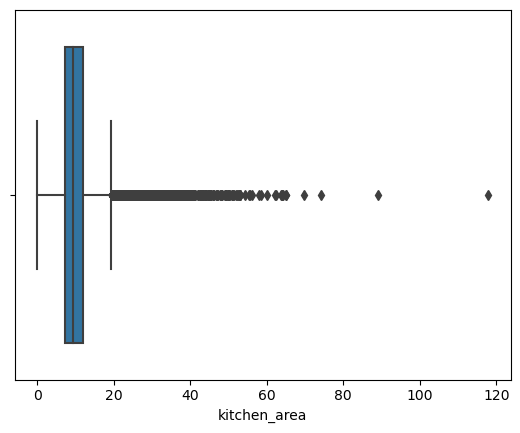

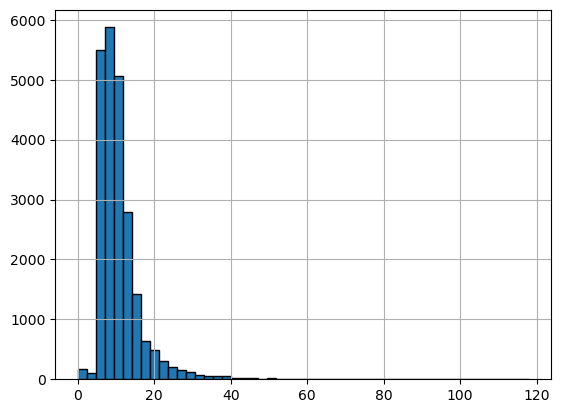

In [74]:
column_info('kitchen_area')
info_hist('kitchen_area')

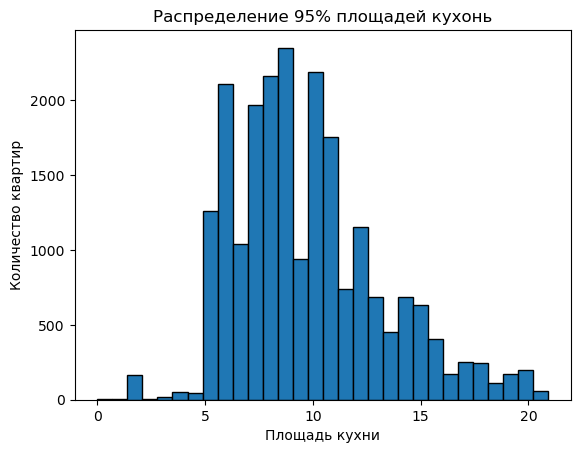

In [75]:
#гистограмма по 95% площадей кухонь
plt.hist(df[df['kitchen_area'] < np.quantile(df['kitchen_area'], 0.95)]['kitchen_area'], bins=30, edgecolor='black')
plt.title('Распределение 95% площадей кухонь')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

Самые распространенные кухни с площадью 5-15 кв.м. Медианное значение площади кухни - 9.5 кв.м.

##### Количество комнат rooms

count    23186.000000
mean         2.026352
std          0.988240
min          0.000000
5%           1.000000
25%          1.000000
50%          2.000000
75%          3.000000
85%          3.000000
90%          3.000000
95%          4.000000
99%          5.000000
max          8.000000
Name: rooms, dtype: float64
Количество пропусков: 0


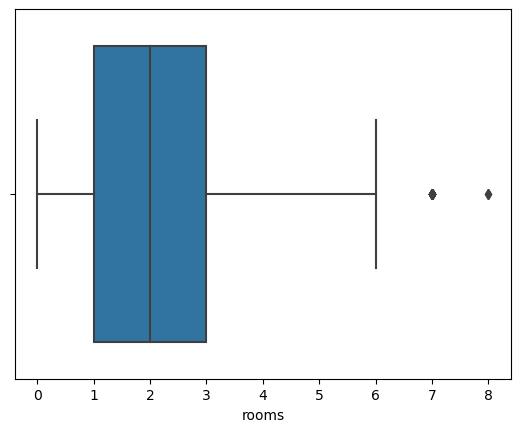

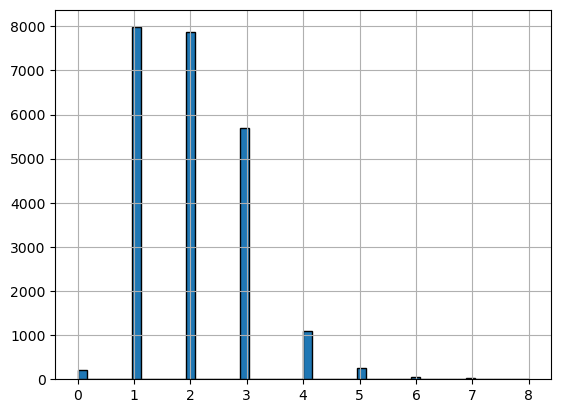

In [76]:
column_info('rooms')
info_hist('rooms')

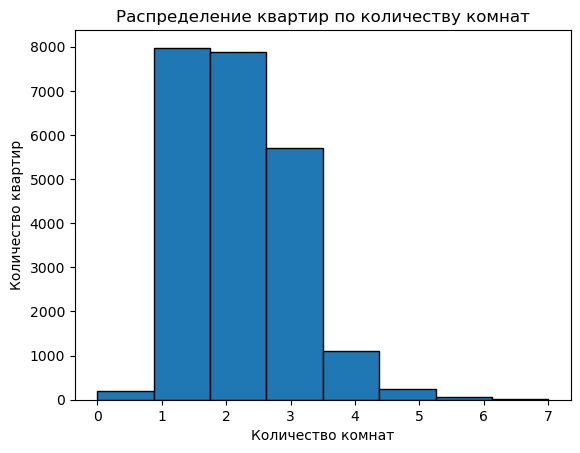

In [77]:
plt.hist(df['rooms'], bins=8, edgecolor='black', range=(0,7))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

In [78]:
df['rooms'].value_counts()

1    7978
2    7874
3    5700
4    1097
5     253
0     204
6      58
7      20
8       2
Name: rooms, dtype: int64

In [79]:
df.groupby('rooms')['total_area'].count().sort_values(ascending=False).head(10)

rooms
1    7978
2    7874
3    5700
4    1097
5     253
0     204
6      58
7      20
8       2
Name: total_area, dtype: int64

Наиболее часто встречающиеся экземпляры - квартиры с одной и двумя комнатами, 4-комнатных квартир в 7 раз меньше, чем однокомнатных, квартир с 5 и более комнат меньше 1% от выборки.

##### Высота потолков ceiling_height

count    23186.000000
mean         2.690975
std          0.205943
min          2.300000
5%           2.500000
25%          2.600000
50%          2.650000
75%          2.700000
85%          2.800000
90%          3.000000
95%          3.100000
99%          3.500000
max          5.800000
Name: ceiling_height, dtype: float64
Количество пропусков: 0


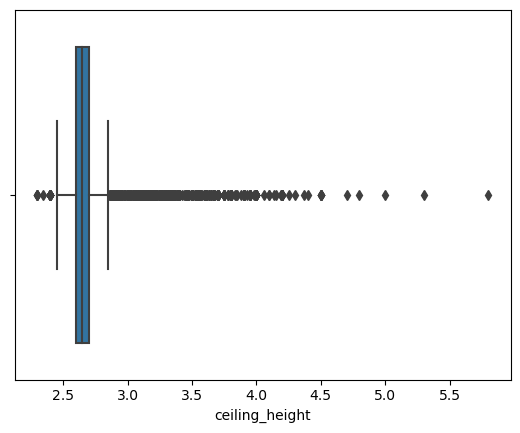

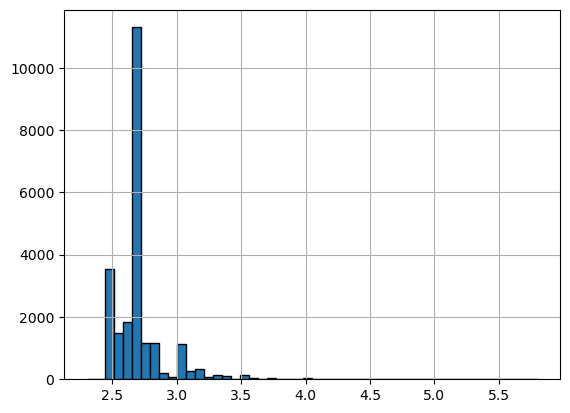

In [80]:
column_info('ceiling_height')
info_hist('ceiling_height')

Большая часть квартир имеет потолки от 2.5 до 3 метров

##### Этаж квартиры floor

count    23186.000000
mean         5.891788
std          4.890130
min          1.000000
5%           1.000000
25%          2.000000
50%          4.000000
75%          8.000000
85%         11.000000
90%         13.000000
95%         16.000000
99%         23.000000
max         33.000000
Name: floor, dtype: float64
Количество пропусков: 0


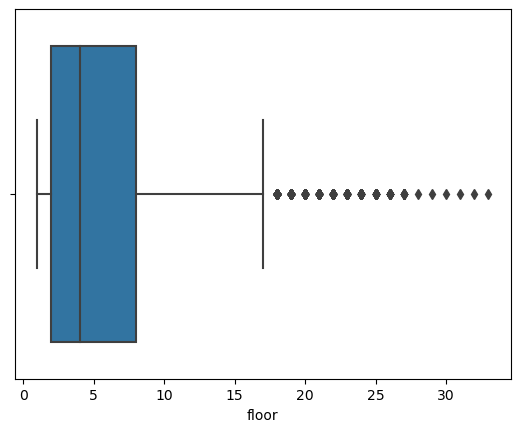

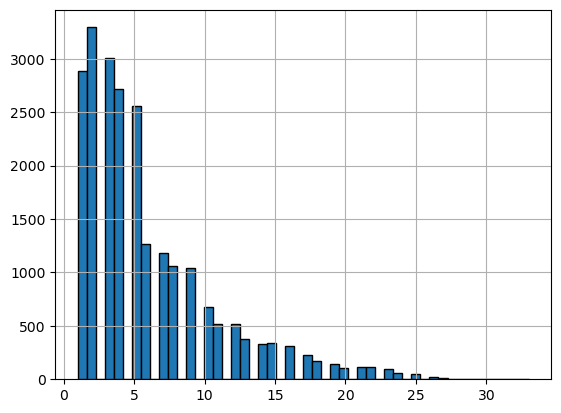

In [81]:
column_info('floor')
info_hist('floor')

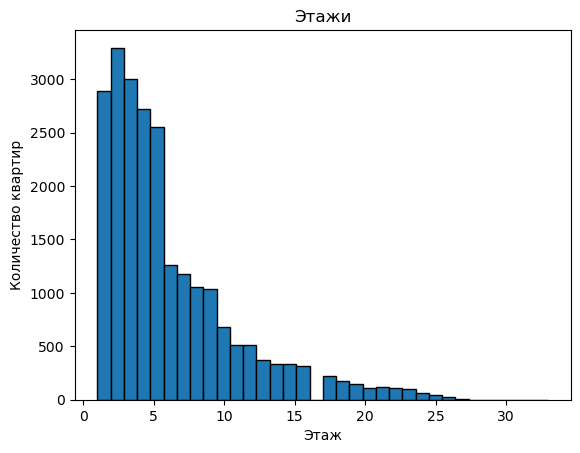

In [82]:
plt.hist(df['floor'], bins=34, edgecolor='black', range=(1,33))
plt.title('Этажи')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Чаще продают квартиры на этажах с 1 по 5, наверное это связано с тем, что пятиэтажки самое распространенное жилье.

##### Тип этажа квартиры floor_type

In [83]:
print(df['floor_type'].value_counts(dropna=False))

другой       17066
последний     3258
первый        2862
Name: floor_type, dtype: int64


##### Общее количество этажей в доме floors_total

count    23186.000000
mean        10.731131
std          6.613218
min          1.000000
5%           4.000000
25%          5.000000
50%          9.000000
75%         16.000000
85%         18.000000
90%         22.000000
95%         25.000000
99%         26.000000
max         60.000000
Name: floors_total, dtype: float64
Количество пропусков: 0


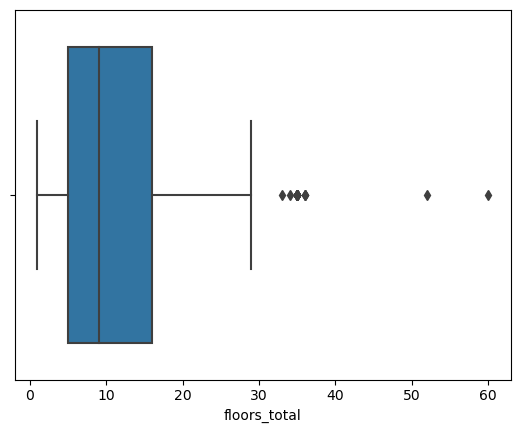

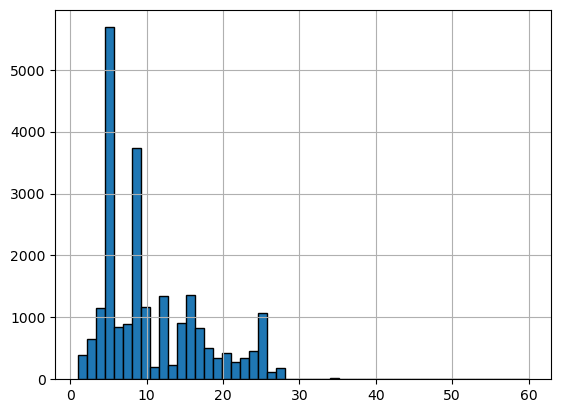

In [84]:
column_info('floors_total')
info_hist('floors_total')

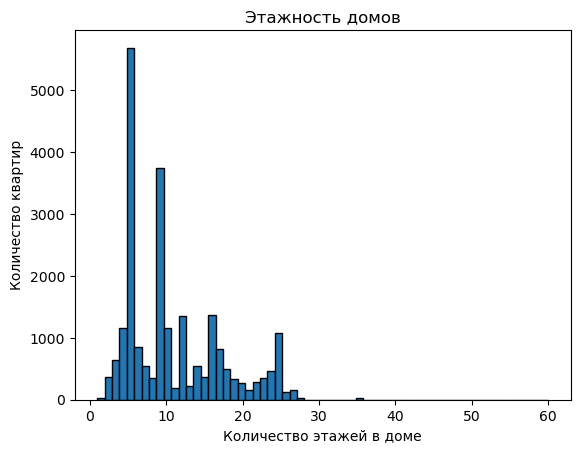

In [85]:
plt.hist(df['floors_total'], bins=61, edgecolor='black', range=(1,60))
plt.title('Этажность домов')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

Самые распространенные дома имеют 5 и 9 этажей.

##### Расстояние до центра города city_center_km

count    17707.000000
mean        14.338341
std          8.601577
min          0.000000
5%           4.000000
25%         10.000000
50%         13.000000
75%         16.000000
85%         20.000000
90%         26.000000
95%         32.000000
99%         50.000000
max         66.000000
Name: city_center_km, dtype: float64
Количество пропусков: 5479


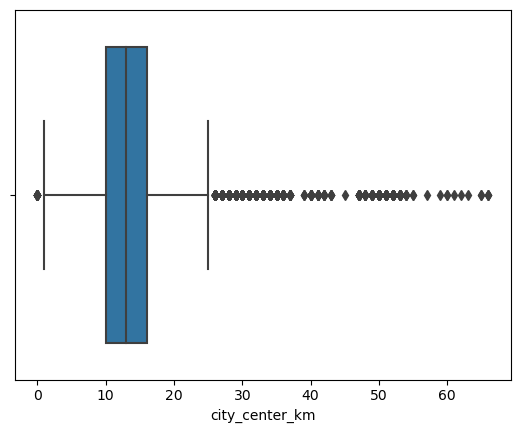

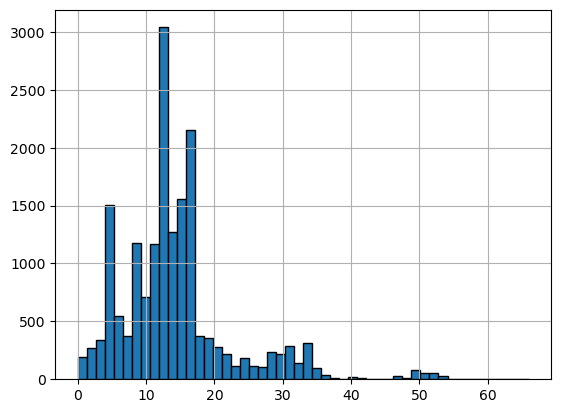

In [86]:
column_info('city_center_km')
info_hist('city_center_km')

Столбец нужен для исследования, есть смысл заполнить пропуски.
Посмотрю, сколько пропусков.

In [87]:
df.query('city_center_km.isna()').value_counts(subset='locality_name')

locality_name
поселок Мурино                        552
Всеволожск                            397
Гатчина                               307
деревня Кудрово                       299
Выборг                                235
                                     ... 
поселок Алексеевка                      1
коттеджный поселок Счастье              1
коттеджный поселок Лесное               1
коттеджный поселок Кивеннапа Север      1
село Шум                                1
Length: 304, dtype: int64

Можно попробовать заполнить данные по СПб медианой, т.к. по нему есть отдельное задание. Для остальных населенных пунктов не ясно, должно быть указано расстояние до центра поселения или до центра СПб, в условии отсутствия координат и пояснений в описании данных не буду трогать эти пропуски.

In [88]:
df['city_center_km'] = df.query('locality_name == "Санкт-Петербург"').groupby('locality_name')['city_center_km'].apply(lambda x: x.fillna(x.median))
# проверю, что сработало
df.query('city_center_km.isna() and locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,city_center_km


##### Расстояние до ближайшего аэропорта airports_nearest

count    17687.000000
mean     28837.278397
std      12718.345325
min          0.000000
5%       11555.000000
25%      18471.000000
50%      26832.000000
75%      37407.000000
85%      43431.000000
90%      47303.000000
95%      51393.000000
99%      58860.960000
max      84869.000000
Name: airports_nearest, dtype: float64
Количество пропусков: 5499


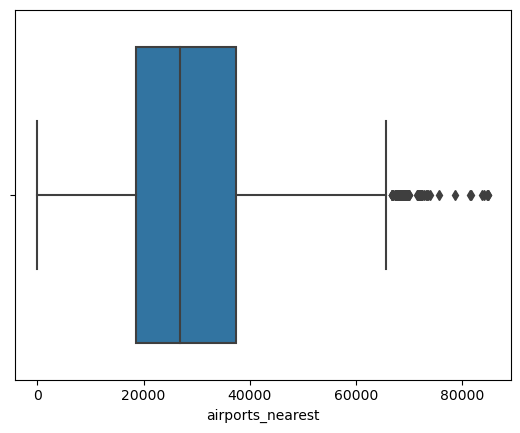

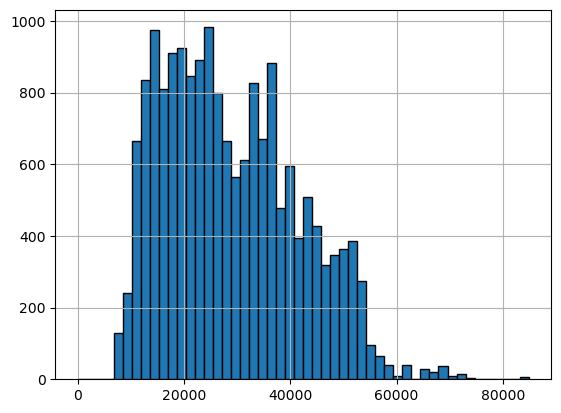

In [89]:
column_info('airports_nearest')
info_hist('airports_nearest')

count    15227.000000
mean     28068.711696
std      11635.269641
min          0.000000
25%      18428.000000
50%      26875.000000
75%      36706.000000
max      54784.000000
Name: airports_nearest, dtype: float64


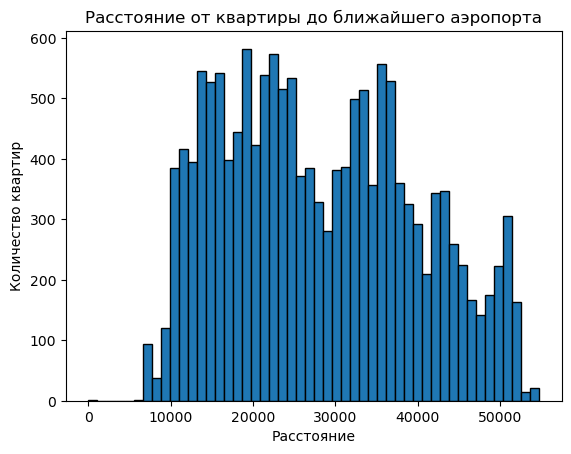

In [90]:
print(df[df['locality_name'] == 'Санкт-Петербург']['airports_nearest'].describe())
plt.hist(df[df['locality_name'] == 'Санкт-Петербург']['airports_nearest'], bins=50, edgecolor='black')
plt.title('Расстояние от квартиры до ближайшего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

count     2460.000000
mean     33594.581301
std      17287.191391
min       9294.000000
25%      18555.750000
50%      26750.000000
75%      52611.000000
max      84869.000000
Name: airports_nearest, dtype: float64


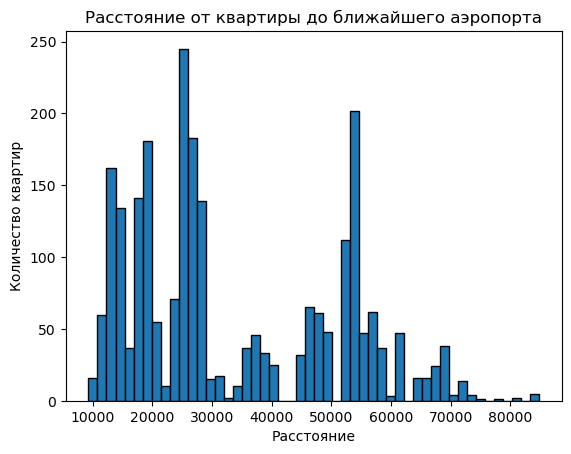

In [91]:
print(df[df['locality_name'] != 'Санкт-Петербург']['airports_nearest'].describe())
plt.hist(df[df['locality_name'] != 'Санкт-Петербург']['airports_nearest'], bins=50, edgecolor='black')
plt.title('Расстояние от квартиры до ближайшего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

##### Расстояние до ближайшего парка parks_nearest

count    7779.000000
mean      493.300553
std       342.297967
min         1.000000
5%         96.000000
25%       289.000000
50%       456.000000
75%       614.000000
85%       696.000000
90%       763.000000
95%       974.500000
99%      2102.000000
max      3190.000000
Name: parks_nearest, dtype: float64
Количество пропусков: 15407


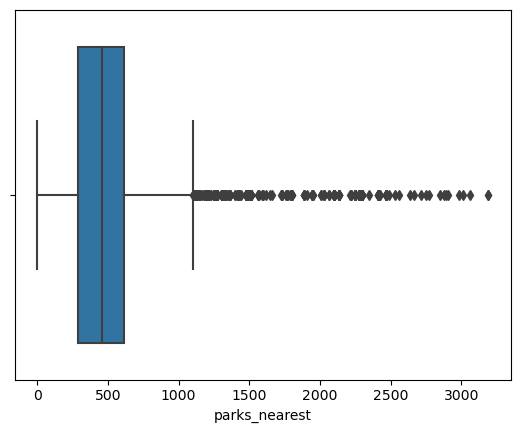

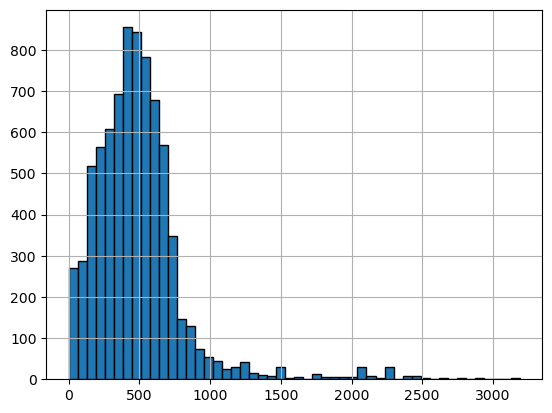

In [92]:
column_info('parks_nearest')
info_hist('parks_nearest')

Большое количество пропусков по столбцу

In [93]:
df[df['locality_name'] != 'Санкт-Петербург']['parks_nearest'].isna().sum()

7115

Предположили, что расстояния до парка в основном не указаны в небольших населенных пунктах, но это предположение не подтверждается. Пока оставляем пропуски.

##### День публикации объявления weekday

count    23186.000000
mean         2.566031
std          1.789088
min          0.000000
5%           0.000000
25%          1.000000
50%          3.000000
75%          4.000000
85%          5.000000
90%          5.000000
95%          6.000000
99%          6.000000
max          6.000000
Name: weekday, dtype: float64
Количество пропусков: 0


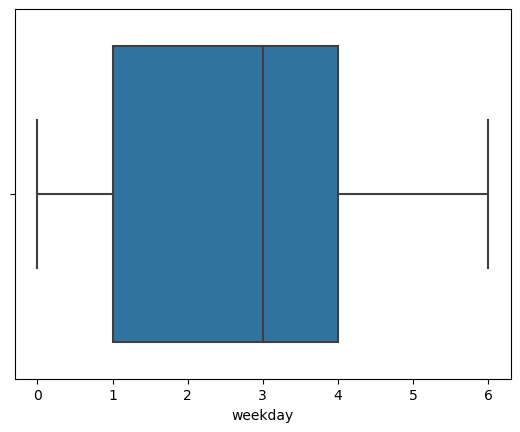

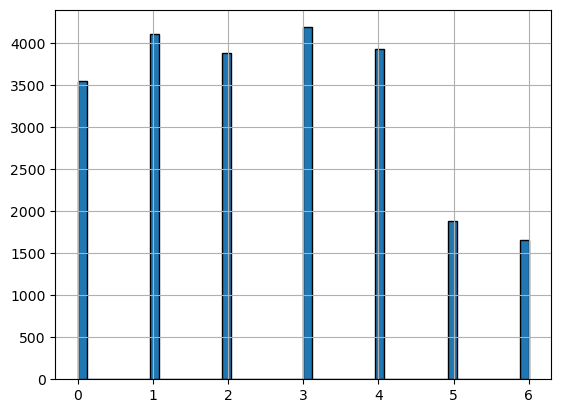

In [94]:
column_info('weekday')
info_hist('weekday')

В выходные на сервисе размещается меньшее количество объектов, чем в рабочии дни

##### Месяц публикации объявления month

count    23186.000000
mean         6.400543
std          3.492579
min          1.000000
5%           1.000000
25%          3.000000
50%          6.000000
75%         10.000000
85%         11.000000
90%         11.000000
95%         12.000000
99%         12.000000
max         12.000000
Name: month, dtype: float64
Количество пропусков: 0


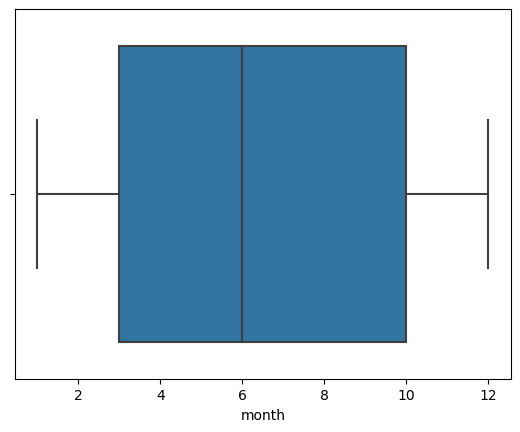

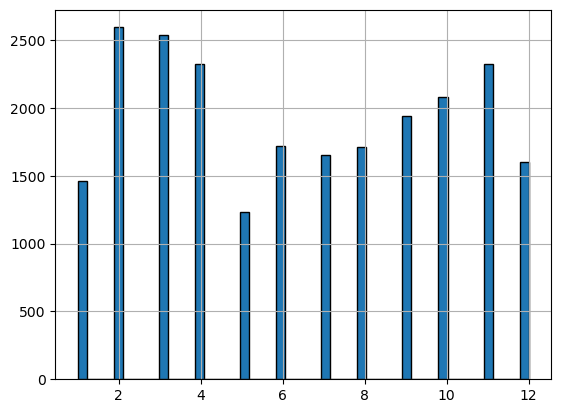

In [95]:
column_info('month')
info_hist('month')

Спады по количеству размещаемых объектов в декабре, январе и мае.   
Декабрь - "давайте уже после нового года", январь месяц вечного праздника, в мае сажаем картошку. Летом чуть больше оживления относительно мая. На лицо ярко выраженная сезонность: большее количество объектов размещается с февраля по апрель и с сентября по ноябрь.

##### Год публикации year

count    23186.000000
mean      2017.377254
std          1.033015
min       2014.000000
5%        2015.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
85%       2018.000000
90%       2019.000000
95%       2019.000000
99%       2019.000000
max       2019.000000
Name: year, dtype: float64
Количество пропусков: 0


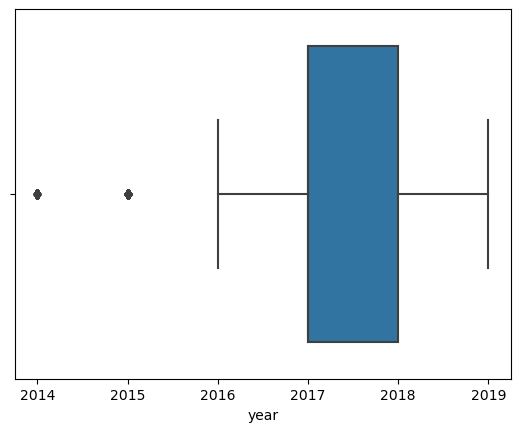

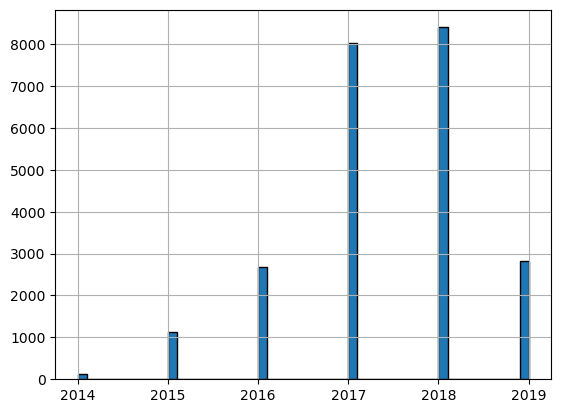

In [96]:
column_info('year')
info_hist('year')

In [97]:
# сводная таблица с агрегированием по годам и месяцам
df.pivot_table(index='month',columns='year',values='last_price',aggfunc='count')

year,2014,2015,2016,2017,2018,2019
month,,,,,,
1,NaN,58.0,115.0,286.0,587.0,416.0
2,NaN,58.0,248.0,423.0,1317.0,548.0
3,NaN,106.0,340.0,218.0,1012.0,863.0
4,NaN,49.0,407.0,621.0,301.0,944.0
5,NaN,65.0,421.0,544.0,148.0,58.0
6,NaN,87.0,443.0,663.0,523.0,NaN
7,NaN,89.0,137.0,568.0,859.0,NaN
8,NaN,85.0,88.0,726.0,816.0,NaN
9,NaN,88.0,117.0,971.0,764.0,NaN


С 2015 по 2018 год наблюдается рост размещаемых объявлений, скорее всего связано с принятием программ поддержки ипотечных заёмщиков, оживлением после кризиса 2014г. и развитием онлайн-сервисов недвижимости.
По 2014 году данные только за 2 месяца, по 2019 году также датафрейм заполнен не полностью - только за пять месяцев.

#### Скорость продажи квартир

count    20104.000000
mean       179.054815
std        218.002715
min          1.000000
5%           9.000000
25%         45.000000
50%         94.000000
75%        228.000000
85%        359.000000
90%        453.000000
95%        638.000000
99%       1061.000000
max       1580.000000
Name: days_exposition, dtype: float64
Количество пропусков: 3082


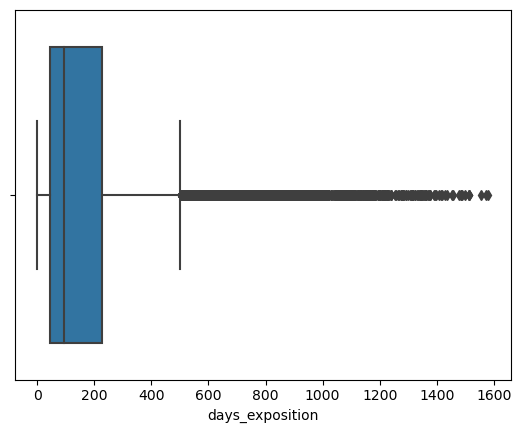

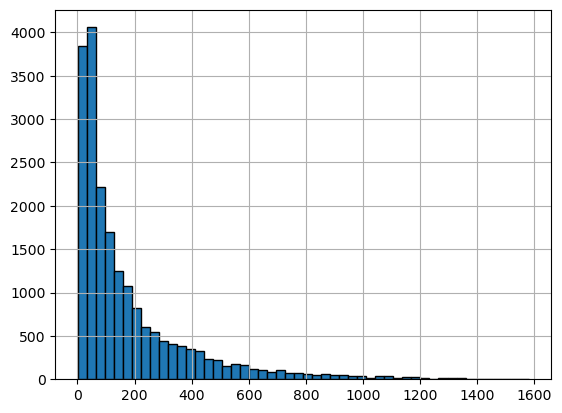

In [98]:
column_info('days_exposition')
info_hist('days_exposition')

In [99]:
print('Среднее =', round(df['days_exposition'].mean(),1))
print('Медиана =', df['days_exposition'].median())

Среднее = 179.1
Медиана = 94.0


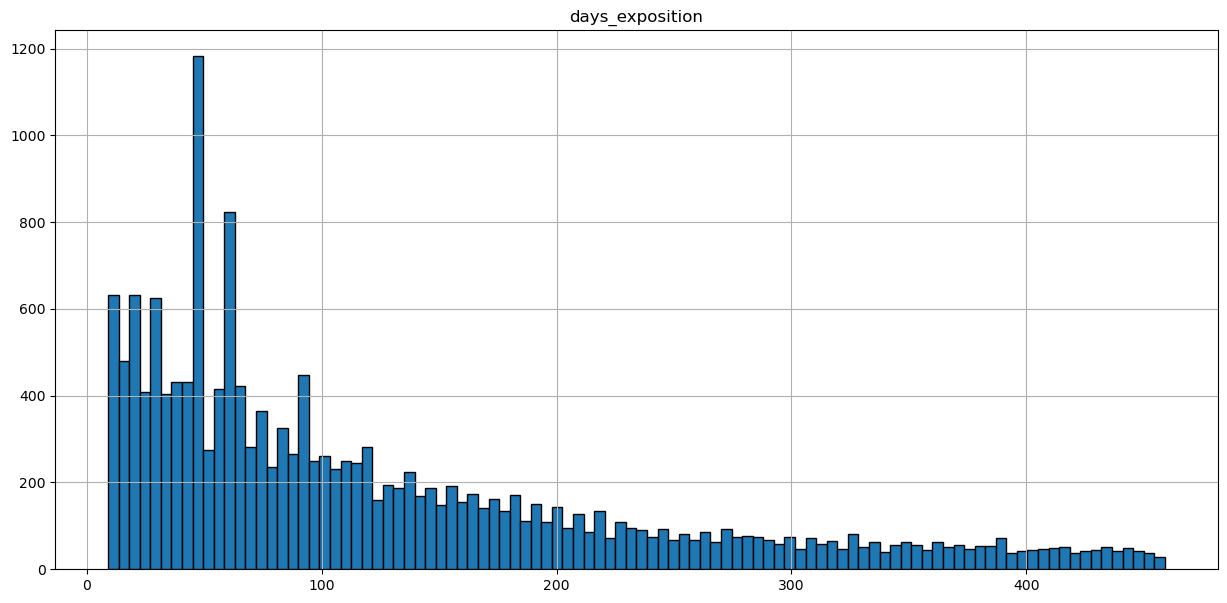

In [100]:
df.hist('days_exposition', bins=100, figsize=(15, 7), range=(9, 459), edgecolor='black');

In [101]:
# как группируются квартиры по длительности продажи
df.groupby('days_exposition')['month'].count().sort_values(ascending=False).head(10)

days_exposition
45.0    875
60.0    538
7.0     233
30.0    206
90.0    183
4.0     174
3.0     157
5.0     147
14.0    142
9.0     138
Name: month, dtype: int64

In [102]:
# какие квартиры продаются быстрее
df.pivot_table(index='rooms', values='days_exposition', aggfunc='median')

,days_exposition
rooms,
0,45.0
1,81.0
2,91.0
3,113.5
4,154.0
5,164.0
6,204.0
7,130.0
8,115.0


Медиана и среднее отличаются почти в два раза. 
15% квартир продаются больше года.
Быстрой продажей можно считать 1,5 месяца.
Средняя продолжительность - 3 месяца.
Быстрее всего продаются студии (45 дней) и однокомнатные квартиры (81 день).
Предложений по студиям много меньше, возможно поэтому они "уходят" быстрее.
Предполагаем, что пики на значениях 45 и 60 связаны с автоматическим удалением объявления, если его не продлить, если это так, то оценки скорости продажи по days_exposition очень относительны.

Хотелось оценить, влияет ли наличие фотокарточек и их количество на время продажи. Такой связи не выявлено:

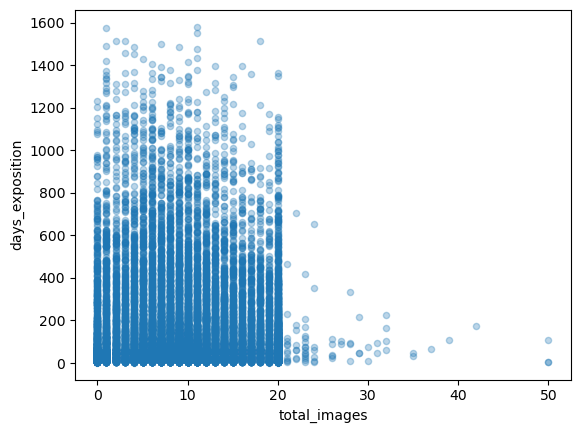

In [103]:
df.plot(x='total_images', y='days_exposition', kind='scatter', alpha=0.3);

#### Факторы, влияющие больше всего на стоимость квартиры

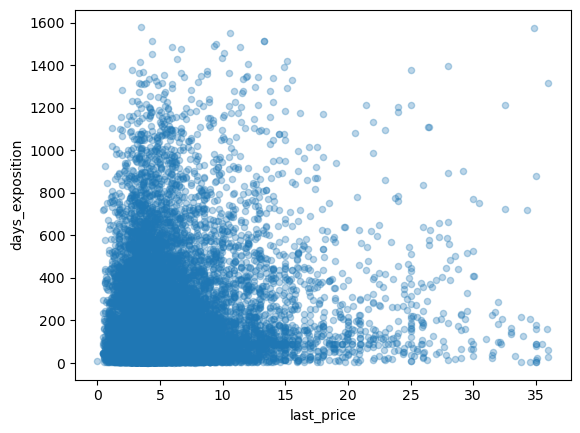

In [104]:
# уберу для первых графиков значения цены больше 200 млн
df_less_200 = df.query('last_price < 200e+6');
# зависимость цены и времени размещения
df_less_200.plot(x='last_price', y='days_exposition', kind='scatter', alpha=0.3);
plt.show()

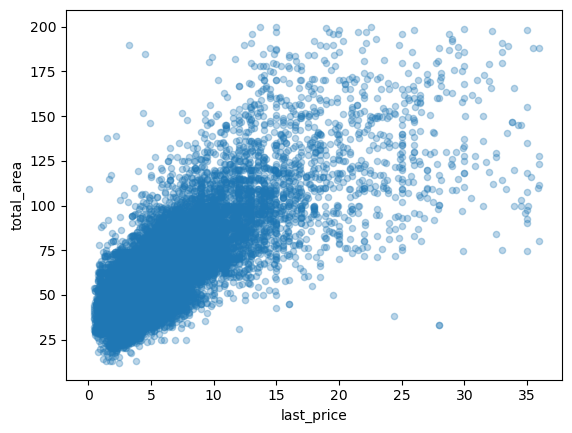

In [105]:
# зависимость цены и общей площади
df_less_200.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3);

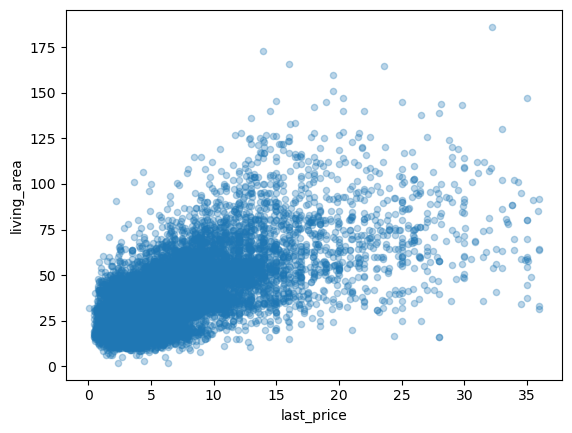

In [106]:
# зависимость цены и жилой площади
df_less_200.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3);

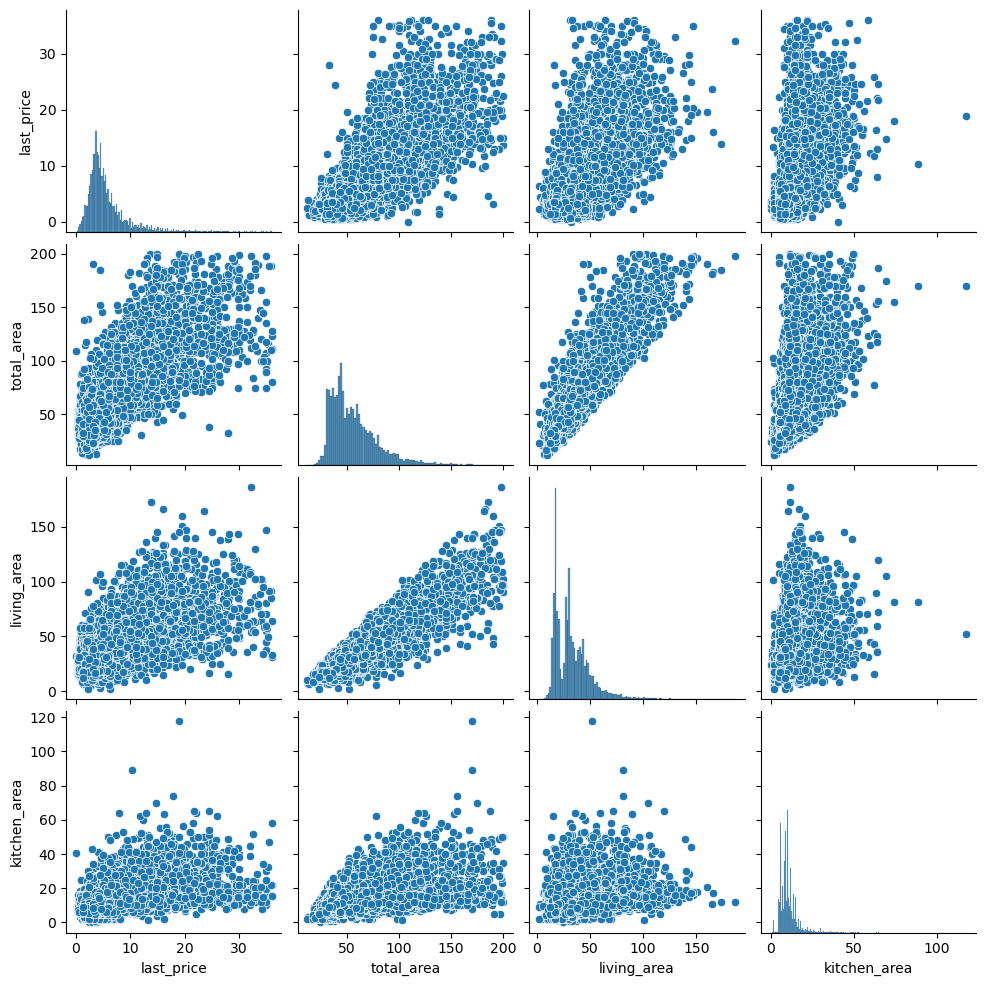

In [107]:
import seaborn as sns
sns.pairplot(df[['last_price', 'total_area', 'living_area', 'kitchen_area']])

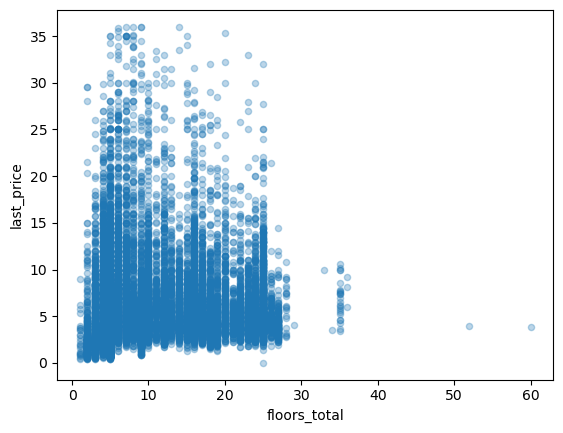

In [108]:
df.plot(x='floors_total', y='last_price', kind='scatter', alpha=0.3);

In [109]:
# поменяю тип данных city_center_km, был object
df['city_center_km'] = pd.to_numeric(df['city_center_km'], errors='coerce')

In [110]:
# матрица корреляции
df_less_200[['last_price', 'sqm_price', 'total_area', 'rooms', 'floor_type', 'city_center_km', 'living_area', 'kitchen_area', 'days_exposition']].corr().style.background_gradient(cmap='coolwarm')

,last_price,sqm_price,total_area,rooms,living_area,kitchen_area,days_exposition
last_price,1.000000,0.694295,0.780184,0.488468,0.667839,0.558354,0.127471
sqm_price,0.694295,1.000000,0.169523,-0.056094,0.080131,0.283575,0.027926
total_area,0.780184,0.169523,1.000000,0.792729,0.918571,0.554514,0.156537
rooms,0.488468,-0.056094,0.792729,1.000000,0.850922,0.237384,0.116126
living_area,0.667839,0.080131,0.918571,0.850922,1.000000,0.323618,0.145410
kitchen_area,0.558354,0.283575,0.554514,0.237384,0.323618,1.000000,0.084396
days_exposition,0.127471,0.027926,0.156537,0.116126,0.145410,0.084396,1.000000


Зависимость цены от площади есть, что логично. Зависимости цены от приближености к центру не наблюдается.

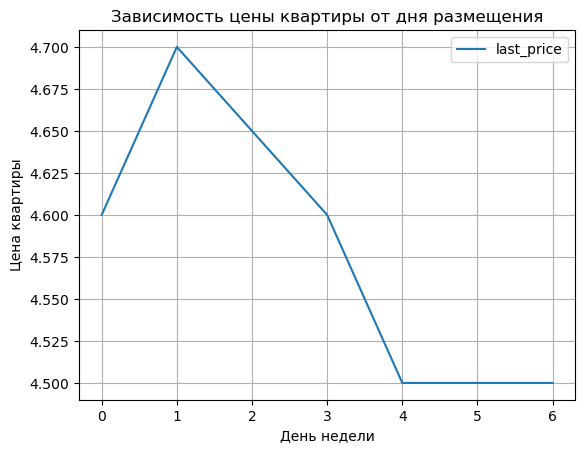

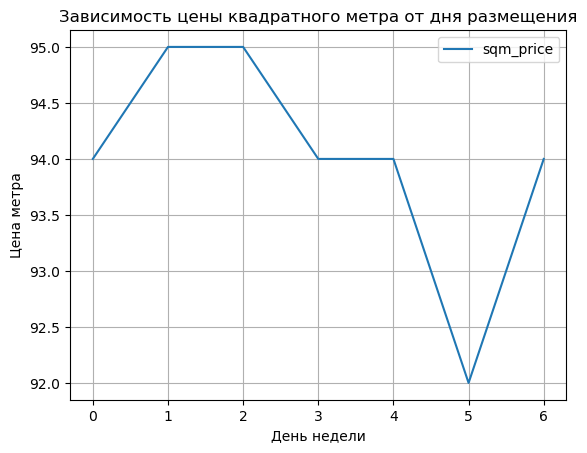

In [111]:
# зависимости цены и квадратного метра от дня размещения
df.pivot_table(index='weekday',values='last_price',aggfunc='median').plot(y='last_price', title='median', grid = True);
plt.title('Зависимость цены квартиры от дня размещения');
plt.xlabel('День недели');
plt.ylabel('Цена квартиры');
df.pivot_table(index='weekday',values='sqm_price',aggfunc='median').plot(y='sqm_price', title='median', grid = True);
plt.title('Зависимость цены квадратного метра от дня размещения');
plt.xlabel('День недели');
plt.ylabel('Цена метра');

Пик цен на квартиры приходится на вторник, потом цена плавно падает и достигает минимума в выходные. Может, владельцы более дорогих квартир не размещают объявления в выходные, поэтому медианное значение падает. Разница между минимум и максимумом 200 тысяч рублей.
А вот стоимость квадратного метра стабильна временными сетами по 2 дня. Разница между минимум и максимумом 3 тысячи рублей.

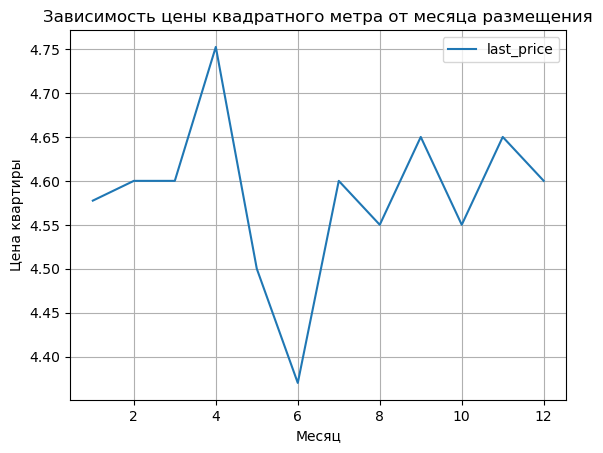

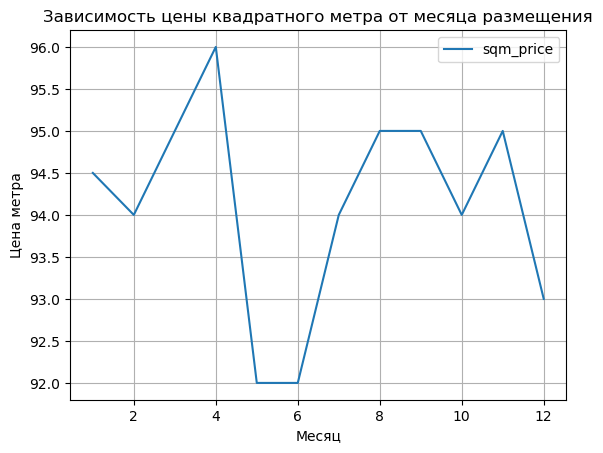

In [112]:
# зависимости цены и квадратного метра от месяца
df.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', title='median', grid = True);
plt.title('Зависимость цены квадратного метра от месяца размещения');
plt.xlabel('Месяц');
plt.ylabel('Цена квартиры');
df.pivot_table(index='month',values='sqm_price',aggfunc='median').plot(y='sqm_price', title='median', grid = True);
plt.title('Зависимость цены квадратного метра от месяца размещения');
plt.xlabel('Месяц');
plt.ylabel('Цена метра');

Наибольшая цена и квартиры и квадратного метра наблюдается в апреле, наименьшая в мае и июне. Хочешь купить квартиру - делай это летом, хотя предложений летом тоже меньше.

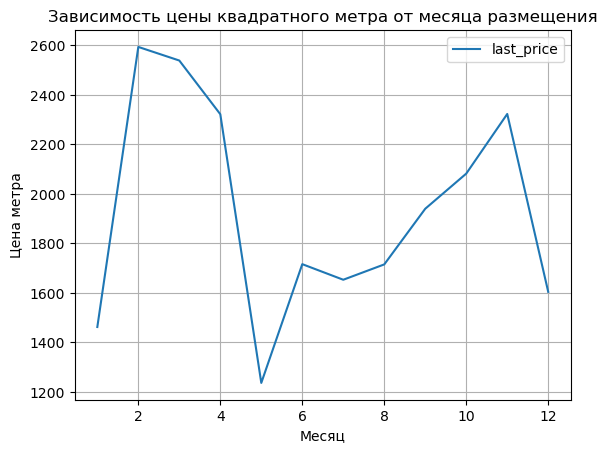

In [113]:
# сводная таблица для оценки количества предложений по месяцам
df.pivot_table(index='month',values='last_price',aggfunc='count').plot(y='last_price', title='median', grid = True);
plt.title('Зависимость цены квадратного метра от месяца размещения');
plt.xlabel('Месяц');
plt.ylabel('Цена метра');

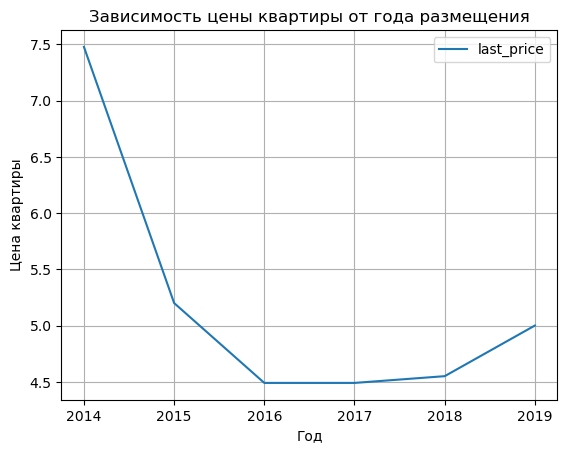

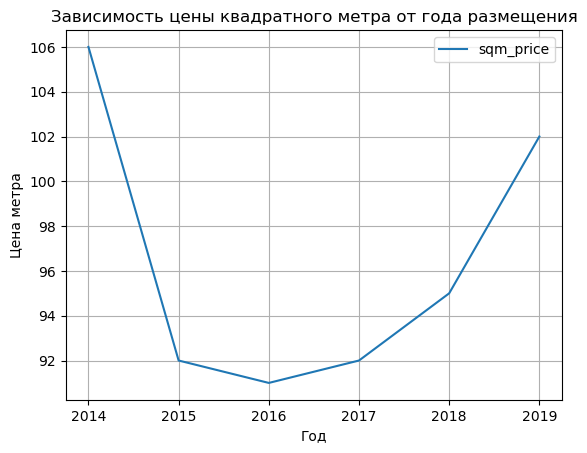

In [114]:
# зависимости цены и квадратного метра от года
df.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', title='median', grid = True);
plt.title('Зависимость цены квартиры от года размещения');
plt.xlabel('Год');
plt.ylabel('Цена квартиры');
df.pivot_table(index='year',values='sqm_price',aggfunc='median').plot(y='sqm_price', title='median', grid = True);
plt.title('Зависимость цены квадратного метра от года размещения');
plt.xlabel('Год');
plt.ylabel('Цена метра');

С 2017 года растут цены и за квадратный метр, и за квартиры.

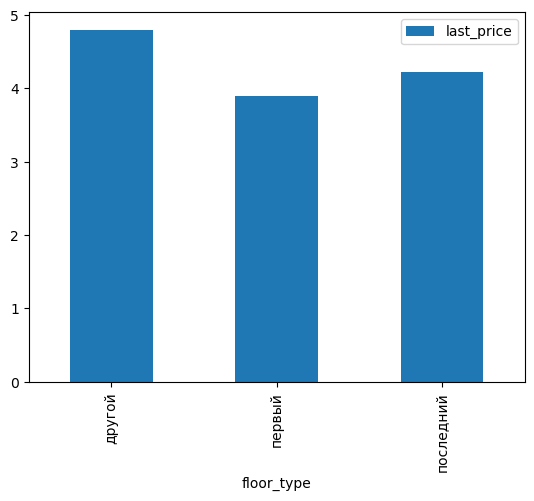

In [115]:
# зависимоть цены от типа этажа
df.pivot_table(index='floor_type',values='last_price', aggfunc='median').plot(y='last_price', kind='bar');

Квартиры на первом этаже стоит дешевле, на последнем этаже - чуть дороже первого.

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [116]:
#10 населенных пунктов с наибольшим числом объявлений

#display(df.pivot_table(index='locality_name', values='sqm_price', aggfunc='count')).sort_values(by=['count','sqm_price'], ascending=False)

top_ten = df.pivot_table(index='locality_name', values='sqm_price', aggfunc=['count', 'median'])
top_ten.columns = ['count', 'median']
top_ten=top_ten.sort_values('count', ascending=False).head(10)
display(top_ten)

,count,median
locality_name,,
Санкт-Петербург,15300,104.0
поселок Мурино,552,86.0
поселок Шушары,439,76.0
Всеволожск,397,65.0
Пушкин,364,99.5
Колпино,337,74.0
поселок Парголово,326,91.0
Гатчина,307,67.0
деревня Кудрово,299,91.0


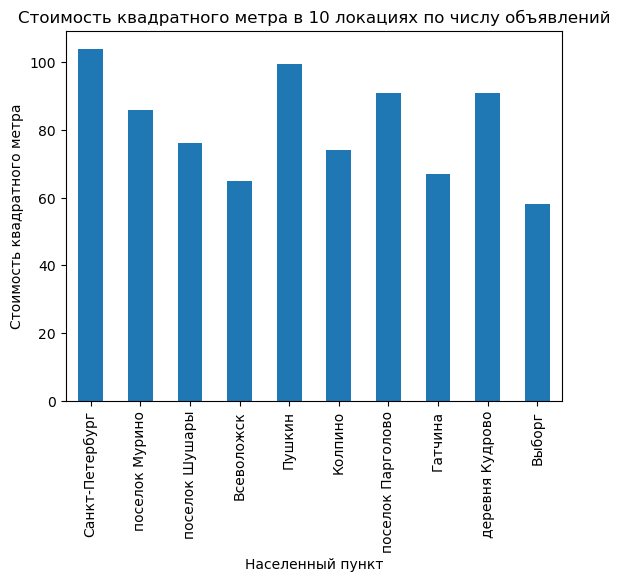

In [117]:
top_ten['median'].plot(kind='bar');
plt.title('Стоимость квадратного метра в 10 локациях по числу объявлений')
plt.xlabel('Населенный пункт')
plt.ylabel('Стоимость квадратного метра')
plt.show()

Наибольшая средняя цена квадратного метра в Санкт-Петербурге. Так же достаточна высокая цена в Пушкине и Парголово, которые считаются курортами, и деревне Кудрово, которая де-факто является продолжением Невского района возле метро Дыбенко.
Наименьшая цена в более удаленных Гатчине и Всеволожске и совсем далёком Выборге.

In [118]:
#населённый пункт с самой низкой стоимостью квадратного метра
df.query('sqm_price == sqm_price.min()')[['locality_name', 'sqm_price']]

,locality_name,sqm_price
8684,Санкт-Петербург,0


In [119]:
df.query('sqm_price == sqm_price.min()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,city_center_km
8684,7,0.01219,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,0,2,3,2019,последний,9.0


In [120]:
#населённый пункт с самой высокой стоимостью квадратного метра
df.query('sqm_price == sqm_price.max()')[['locality_name', 'sqm_price']]

,locality_name,sqm_price
4803,Санкт-Петербург,848
16967,Санкт-Петербург,848


In [121]:
#объект с максимальной стоимостью квадратного метра
df.query('sqm_price == sqm_price.max()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,city_center_km
4803,16,28.0,33.0,2019-04-29,1,3.5,5.0,15.984375,2,False,False,False,8.25,0,Санкт-Петербург,23447.0,1376.0,3.0,344.0,3.0,119.0,NaN,848,0,4,2019,другой,1.0
16967,14,28.0,33.0,2019-04-30,1,3.5,5.0,15.984375,2,False,False,False,8.25,0,Санкт-Петербург,23403.0,1462.0,3.0,342.0,3.0,27.0,NaN,848,1,4,2019,другой,1.0


Ожидаемо, что самая высокая стоимость квадратного метра и большее же число объектов с СПб и городах-спутниках

#### Cредняя цена каждого километра в Санкт-Петербурге.   
#### Зависимость цены объектов от расстояния до центра города

,floors_total,last_price,sqm_price
city_center_km,,,
0.0,5.0,12.500000,138.0
1.0,5.0,10.100000,124.0
2.0,5.0,9.350000,117.0
3.0,5.0,8.299500,108.0
4.0,5.0,8.900000,117.0
5.0,6.0,8.910131,126.0
6.0,7.0,8.176000,125.0
7.0,8.0,7.200000,122.0
8.0,10.0,7.300000,122.0


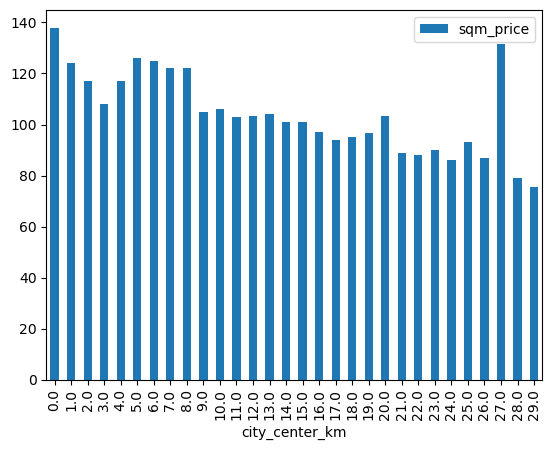

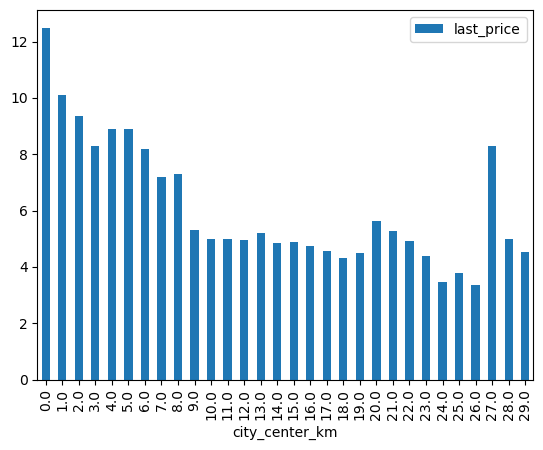

In [122]:
#цена каждого километра
display(df.query('locality_name == "Санкт-Петербург"').
        pivot_table(index='city_center_km', values=['sqm_price', 'last_price', 'floors_total'], aggfunc='median').
        head(12))
df.query('locality_name == "Санкт-Петербург"').\
    pivot_table(index='city_center_km', values='sqm_price', aggfunc='median').\
    plot(y='sqm_price', kind='bar')
df.query('locality_name == "Санкт-Петербург"').\
    pivot_table(index='city_center_km', values='last_price', aggfunc='median').\
    plot(y='last_price', kind='bar');

Стоимость квартир в сердце СПб самая высокая, имеет тенденцию снижения к границе центральных районов (радиус 3 км).
Зависимость цены квартиры от удаленности объекта от центра нелинейная.
По графику заметен скачок на 4-5 км. В эту область попадает район с дорогой недвижимостью Крестовский остров.
Далее цена убывает по мере удаления объектов от центра, после 10го км цена более-менее стабильна - это новые районы с новостройками и старые района с высотными панельными домами.

In [123]:
df.query('(locality_name == "Санкт-Петербург") and (city_center_km == 27)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,city_center_km
732,13,14.35,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,193,1,11,2017,другой,27.0
5891,6,2.25,32.0,2018-02-27,1,2.65,2.0,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0.0,NaN,0.0,NaN,178.0,70,1,2,2018,последний,27.0


Скачок на 27 км объясняется выборкой всего их двух объектов, один из которых стоит как квартира в центре города.

In [124]:
#статистики для выводов
df['sqm_price'].describe()

count    23186.000000
mean        96.328690
std         37.051735
min          0.000000
25%         76.000000
50%         94.000000
75%        113.000000
max        848.000000
Name: sqm_price, dtype: float64

In [125]:
#стоимость квадратного метра в зависимости от количества комнат
df.groupby('rooms')['sqm_price'].median()

rooms
0    105.0
1    100.0
2     92.0
3     88.0
4     90.0
5     90.0
6     90.0
7    109.5
8    111.5
Name: sqm_price, dtype: float64

In [126]:
df.query('locality_name == "Санкт-Петербург"')['total_area'] .count()

15300

### Общий вывод

Датафрейм с информацией по продаже квартир состоял из 23699 строк и 22 колонок. 

*Предобработка данных*

В процессе предобработки было удалено 513 строк, осталось 23186 строк, удалено 2,2% данных.  
В столбце first_day_exposition был изменен тип данных с object на datetime.  
Строки с количеством комнат 9 и больше в столбце rooms были удалены.  
В столбце ceiling_height были удалены выбросы, ошибочно введенные значения были исправлены делением на 10, пропуски были заполнены медианным значением.  
Строки с пропусками столбце floors_total были удалены.  
В столбцах living_area и kitchen_area пропуски заполнены значениями разницы общей площей площади и жилой площади /кухни, а также медианной долей от общей площади для строк, где не было значений ни living_area, ни kitchen_area.  
Заполнены пропуски в is_apartment.  
Заполнены пропуски в balcony.  
Строки с пропусками столбце locality_name были удалены.  
В столбце city_centers_nearest пропуски для Санкт-Петербурга были заполнены медианным значением, остальные пропуски были оставлены.  

Было добавлено 7 столбцов, в которых были подсчитаны дополнительные параметры:  
-цена квадратного метра;
-день недели, месяц и год публикации объявления;
-тип этажа квартиры: варианты — первый, последний, другой;
-расстояние до центра в километрах.


*Изучение параметров*  

Большинство квартир продается в Санкт-Петербурге - 15300 объявлений. В топ-10 по количеству объявлений также входят: поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг.  

Средняя площадь 57,7 кв. метра, медианная - 51,4.  
95% квартир имеют общую площадь до 107 кв. метров, квартиры от 107 до 200 составляют менее 5% процентов.  

Средняя длительность продажи недвижимости составила 3 месяца (95 дней) с момента публикации. Четверть квартир была продана в течение 45 дней.  

Средняя цена квадратного метра - 94 тысячи рублей.  
Цена квадратного метра в студии и однушке выше, чем в 2, 3-к квартирах.  
Квартиры в центре ожидаемо дороже.  

95% всех объектов стоят меньше 13,5 млн.рублей. Средняя цена - 4,6 млн.  
Есть разница в стоимость квартир в Санкт-Петербурге и Ленинградской области:  
  75% объектов в ЛО имеют цену менее 4,6 млн.рублей. Средняя цена - 3,65 млн.  
  75% объектов в СПб имеют цену менее 7,5 млн.рублей. Средняя цена - 5,21 млн.  
    
Из 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин, деревня Кудрово и поселок Парголово, а меньше всего цена за квадратный метр в Выборге, Всеволожске и Гатчине.    
  
  
*Факторы, влияющие на стоимость квартиры*  

Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью.  
Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже, что понятно: в среднем с ростом числа комнат растет общая площадь квартиры.  
Квартиры на первом или последнем этаже продаются по более низкой цене.  

Расстояние до центра города и район также влияет на стоимость квартиры: чем дальше от центра, тем дешевле. Хотя имеет значения престижности района, который может быть чудь дальше от центра, но с более дорогой стоимостью недвижимости.  

Дата публикации имеют влияние на цену квартиры.  
С 2016. наблюдается устойчивая тенденция роста цены квадратного метра.  
Осенью и ранней весной квартиры дороже: так разница между средней ценой апреля и июня равна 400 тысячам рублей.  
Также квартиры, размещеные во вторник по какой-то причине имеют цену на 200 тысяч рублей больше по сравнению с квартирами, размещаемыми в выходные.  
Так же летом и в выходные размещается меньше объектов.  

В целом для более точной оценки необходимо добавить другие параметры: дом постойки дома, капитальный ремонт для старого фонда, время до ближайшей станции метро.   